# Walmart Sales Prediction Analysis

Embarking on this exciting project, I aim to craft a sophisticated machine learning model geared towards predicting Walmart sales. This endeavor unfolds as a captivating journey into supervised learning, where our training set boasts labeled data, and our target is the continuous variable representing the weekly sales amount.

The roadmap for this venture is nothing short of a well-orchestrated symphony:
1. **Define the Business Problem:** Unraveling the intricacies of Walmart's sales dynamics sets the stage for our predictive odyssey.
  
2. **Collect Data and Gain Overview:** With data as our compass, we dive into the sea of information, gaining a panoramic view to guide our voyage.

3. **Split Data into Train and Test Sets:** Establishing the foundation for robust model development, we carefully partition our data to enable effective training and evaluation.

4. **Explore the Data (EDA):** A thrilling exploration unfolds as we dissect the data, extracting meaningful insights that will shape our predictive prowess.

5. **Data Cleaning and Preprocessing:** Channeling the power of data, we refine and prepare it, ensuring a pristine foundation for our machine learning masterpiece.

6. **Model Training, Comparison, Selection, and Tuning:** The heart of our journey lies in training, comparing, selecting, and fine-tuning models, aiming for precision and predictive excellence.

7. **Final Production Model Testing and Evaluation:** As we unveil our final creation, rigorous testing and evaluation become the litmus test for its real-world efficacy.

8. **Conclude and Interpret Model Results:** The curtain falls as we draw conclusions and decipher the intricate tapestry of results, paving the way for actionable insights.

With each step, I'm driven by a passion to unravel the mysteries of Walmart's sales dynamics, crafting a model that not only predicts but empowers informed decision-making. Join me on this thrilling expedition into the realm of data science, where every insight is a beacon guiding us toward success.

# Datasets Available

Navigating the intricate landscape of Walmart sales prediction involves harnessing the power of diverse datasets strategically released over time. These datasets serve as the pillars supporting a comprehensive understanding of the retail dynamics. Let's delve into the offerings:

1. **Macro Economic Dataset:**
   - *Insight Unveiled:* Unravel the macroeconomic tapestry influencing Walmart sales. Explore economic indicators, inflation rates, and employment trends to decipher the broader financial context shaping consumer behavior.

2. **Events and Holidays Dataset:**
   - *Time to Celebrate:* Capture the spirit of festivities and mark significant events influencing consumer spending. From holidays to special occasions, this dataset unveils the temporal nuances impacting Walmart sales.

3. **Weather Data Set:**
   - *Climate Chronicles:* Weather exerts a profound influence on shopping patterns. Dive into this dataset to uncover the atmospheric conditions that sway consumer decisions, be it rain, shine, or the changing seasons.

4. **Train Data (Sales and the Year/Month):**
   - *Sales Symphony:* The heartbeat of the prediction journey lies in this dataset. Sales data intricately woven with the temporal facets of years and months lays the foundation for predictive modeling. As we traverse this dataset, we decode the sales patterns, paving the way for a robust predictive model.

Each dataset, released strategically, adds a layer of complexity and richness to our understanding. Together, they form the mosaic that guides us on the quest to predict Walmart sales. Stay tuned as each dataset unfolds, revealing its unique contribution to the narrative of retail forecasting. 
The synergy of macroeconomics, events, weather, and sales intricately woven is the key to unlocking the secrets of Walmart's commercial success.

In [2]:
!pip install keras
!pip install nbconvert
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.2 which is incompatible.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires 

# Importing Important Libraries 

In [3]:
# Data Manipulation and Visualization.
import numpy as np
import pandas as pd
import matplotlib.pylab as plt  # Matplotlib for basic plotting.
import matplotlib.dates as mdates
import seaborn as sns  # Seaborn for statistical data visualization.
import ydata_profiling # Pandas Profiling for exploratory data analysis.
from datetime import datetime

# Statistical and Machine Learning Libraries.
import statsmodels.api as sm  # Statistical models and tests.
from sklearn import metrics  # Evaluation metrics for machine learning.
from sklearn.model_selection import train_test_split  # Deprecated. Consider using from sklearn.model_selection.
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso  # Linear regression models.
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor  # Ensemble models.
from sklearn.svm import SVC, LinearSVC  # Support Vector Machines.
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, mean_squared_error  # Evaluation metrics.
from sklearn.tree import DecisionTreeRegressor  # Decision tree-based regression.
from xgboost import XGBRegressor  # XGBoost for boosting algorithms.
from sklearn.decomposition import PCA  # Principal Component Analysis.
from statsmodels.tsa.stattools import adfuller  # Time Series Analysis.
from statsmodels.tsa.arima_model import ARIMA  # AutoRegressive Integrated Moving Average.
from sklearn.cluster import KMeans  # Clustering algorithm.
from sklearn.preprocessing import MinMaxScaler  # Feature scaling.

# TensorFlow and Keras for Deep Learning.
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout  # Neural network layers.
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning.

# Additional settings.
%matplotlib inline 
plt.rcParams['figure.figsize'] = 15, 6  # Matplotlib figure size setting.

# Avoid Messages
import warnings
warnings.filterwarnings("ignore")  # Ignore warning messages.

# Measuring training time.
import time
plt.style.use('ggplot')  # Styling for matplotlib plots.

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


# Loading Datasets

In [4]:
train= pd.read_csv('/kaggle/input/walmart-sales-prediction-hyd-july23/train.csv')
Events_HolidaysData = pd.read_excel('/kaggle/input/walmart-sales-prediction-hyd-july23/Events_HolidaysData.xlsx')
WeatherData = pd.read_excel('/kaggle/input/walmart-sales-prediction-hyd-july23/WeatherData.xlsx')
Macro_economicsData = pd.read_excel('/kaggle/input/walmart-sales-prediction-hyd-july23/macro_economic.xlsx')

# Data Preprocessing

In [5]:
train.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       180 non-null    int64  
 1   Month                      180 non-null    int64  
 2   ProductCategory            180 non-null    object 
 3   Sales(In ThousandDollars)  170 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


# Summary Satatistic for train data

In [7]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,180.0,2011.000000,1.418158,2009.0,2010.00,2011.0,2012.00,2013.0
Month,180.0,6.500000,3.461682,1.0,3.75,6.5,9.25,12.0
Sales(In ThousandDollars),170.0,1616.729412,1158.224405,471.0,704.00,1041.0,2609.75,4865.0


In [8]:
print('Number of row and column:\n',train.shape)

Number of row and column:
 (180, 4)


In [9]:
Macro_economicsData.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [10]:
Macro_economicsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Year-Month                                                         96 non-null     object 
 1   Monthly Nominal GDP Index (inMillion$)                             96 non-null     float64
 2   Monthly Real GDP Index (inMillion$)                                96 non-null     float64
 3   CPI                                                                96 non-null     float64
 4   PartyInPower                                                       96 non-null     object 
 5   unemployment rate                                                  96 non-null     float64
 6   CommercialBankInterestRateonCreditCardPlans                        96 non-null     float64
 7   Finance Rate on Personal Loa

# Summary Statictics on Macro economics data
Summary statistics provide a concise snapshot of the central tendency and variability within a dataset. The following table presents an in-depth overview of the key macro-economic indicators, offering insights into their distributions and characteristics.

In [11]:
 Macro_economicsData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly Nominal GDP Index (inMillion$),96.0,16490.078125,1427.554038,14317.372922,15210.701514,16422.454368,17772.032416,19015.393408
Monthly Real GDP Index (inMillion$),96.0,15548.932194,773.076316,14345.676097,14919.668252,15442.996869,16262.237629,16918.050624
CPI,96.0,252.372552,9.290857,233.402000,242.474500,254.680500,260.381500,265.421000
unemployment rate,96.0,7.442708,1.766397,4.600000,5.675000,7.750000,9.000000,10.000000
CommercialBankInterestRateonCreditCardPlans,96.0,12.519479,0.722375,11.820000,11.950000,12.220000,13.057500,14.260000
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",96.0,10.447604,0.560651,9.450000,10.030000,10.470000,10.940000,11.440000
Earnings or wages in dollars per hour,96.0,23.793229,1.147167,21.960000,22.797500,23.800000,24.772500,26.040000
Cotton Monthly Price - US cents per Pound(lbs),96.0,91.034479,33.613974,51.500000,70.377500,83.905000,93.322500,229.670000
Change(in%),96.0,0.615521,6.919387,-23.590000,-2.400000,0.350000,3.482500,22.850000
Average upland planted(million acres),96.0,10.647698,1.728418,8.398000,9.296000,10.260500,11.412250,14.431000


In [12]:
print('Number of row and column:\n',Macro_economicsData.shape)

Number of row and column:
 (96, 18)


In [13]:
Events_HolidaysData.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [14]:
Events_HolidaysData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         150 non-null    int64         
 1   MonthDate    150 non-null    datetime64[ns]
 2   Event        150 non-null    object        
 3   DayCategory  150 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.8+ KB


In [15]:
Events_HolidaysData.columns

Index(['Year', 'MonthDate', 'Event', 'DayCategory'], dtype='object')

# Summary Statistic for Events and Holidays Data

In [16]:
Events_HolidaysData.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Year,150.0,2012.54,2009.0,2010.25,2012.5,2015.0,2016.0,2.324743
MonthDate,150,2003-05-02 08:19:12,1930-05-01 00:00:00,2004-07-01 00:00:00,2012-10-01 00:00:00,2021-01-24 06:00:00,2028-11-01 00:00:00,NaN


In [17]:
WeatherData.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,...,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,...,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,...,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,...,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,...,1014,1013,16,16,16,23,11,34,T,NaN


In [18]:
WeatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         365 non-null    int64 
 1   Month                        365 non-null    object
 2   Day                          365 non-null    int64 
 3   Temp high (°C)               365 non-null    int64 
 4   Temp avg (°C)                365 non-null    int64 
 5   Temp low (°C)                365 non-null    int64 
 6   Dew Point high (°C)          365 non-null    int64 
 7   Dew Point avg (°C)           365 non-null    int64 
 8   Dew Point low (°C)           365 non-null    int64 
 9   Humidity (%) high            365 non-null    int64 
 10  Humidity (%) avg             365 non-null    int64 
 11  Humidity (%) low             365 non-null    int64 
 12  Sea Level Press. (hPa) high  365 non-null    int64 
 13  Sea Level Press. (hPa) avg   365 no

In [19]:
print('Number of row and column:\n',WeatherData.shape)

Number of row and column:
 (365, 23)


In [20]:
WeatherData.columns

Index(['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)',
       'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)',
       'Dew Point low (°C)', 'Humidity (%) high', 'Humidity (%) avg',
       'Humidity (%) low', 'Sea Level Press. (hPa) high',
       'Sea Level Press. (hPa) avg', 'Sea Level Press. (hPa) low',
       'Visibility (km) high', 'Visibility (km) avg', 'Visibility (km) low',
       'Wind (km/h) low', 'Wind (km/h) avg', 'Wind (km/h) high',
       'Precip. (mm) sum', 'WeatherEvent'],
      dtype='object')

# Summary Statistics of Weather Data 

In [21]:
WeatherData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,365.0,2009.000000,0.000000,2009.0,2009.0,2009.0,2009.0,2009.0
Day,365.0,15.720548,8.808321,1.0,8.0,16.0,23.0,31.0
Temp high (°C),365.0,16.095890,9.613070,-9.0,9.0,17.0,24.0,33.0
Temp avg (°C),365.0,12.430137,9.119697,-11.0,6.0,13.0,21.0,29.0
Temp low (°C),365.0,8.460274,8.834665,-14.0,2.0,9.0,16.0,24.0
Dew Point high (°C),365.0,8.241096,10.080280,-17.0,1.0,10.0,16.0,25.0
Dew Point avg (°C),365.0,5.309589,10.564560,-20.0,-2.0,7.0,14.0,23.0
Dew Point low (°C),365.0,2.030137,11.071529,-22.0,-6.0,3.0,11.0,21.0
Humidity (%) high,365.0,81.701370,16.014798,32.0,70.0,84.0,97.0,100.0
Humidity (%) avg,365.0,65.246575,14.871409,23.0,54.0,66.0,76.0,97.0


# Data cleaning

In [22]:
train.isnull().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    10
dtype: int64

In [23]:
# Fill missing values in 'Sales(In ThousandDollars)' with the mean
train['Sales(In ThousandDollars)'].fillna(train['Sales(In ThousandDollars)'].mean(), inplace=True)

# Verify if there are any missing values after filling
train.isnull().sum()

Year                         0
Month                        0
ProductCategory              0
Sales(In ThousandDollars)    0
dtype: int64

In [24]:
# Convert 'Year-Month' to datetime format
Macro_economicsData['Year-Month'] = pd.to_datetime(Macro_economicsData['Year-Month'])

# Handling missing values in 'AdvertisingExpenses'
Macro_economicsData['AdvertisingExpenses (in Thousand Dollars)'] = pd.to_numeric(Macro_economicsData['AdvertisingExpenses (in Thousand Dollars)'], errors='coerce')

# Add a column for the Party in Power (0 for Democrats, 1 for Republicans)
Macro_economicsData['PartyInPower'] = Macro_economicsData['PartyInPower'].apply(lambda x: 0 if x == 'Democrats' else 1)
Macro_economicsData.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009-01-01,14421.752895,14407.053343,233.402,0,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009-02-01,14389.200466,14366.176571,234.663,0,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009-03-01,14340.701639,14351.786822,235.067,0,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009-04-01,14326.815525,14351.601731,235.582,0,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009-05-01,14345.904809,14368.123959,235.975,0,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [25]:
# Impute missing values with mean for numerical columns
Macro_economicsData.fillna(Macro_economicsData.mean(), inplace=True)

# Impute missing values with mode for categorical columns
Macro_economicsData['AdvertisingExpenses (in Thousand Dollars)'].fillna(Macro_economicsData['AdvertisingExpenses (in Thousand Dollars)'].mode()[0], inplace=True)

# Check for missing values in Macro_economicsData
Macro_economicsData.isnull().sum()

Year-Month                                                           0
Monthly Nominal GDP Index (inMillion$)                               0
Monthly Real GDP Index (inMillion$)                                  0
CPI                                                                  0
PartyInPower                                                         0
unemployment rate                                                    0
CommercialBankInterestRateonCreditCardPlans                          0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    0
Earnings or wages  in dollars per hour                               0
AdvertisingExpenses (in Thousand Dollars)                            0
Cotton Monthly Price - US cents per Pound(lbs)                       0
Change(in%)                                                          0
Average upland planted(million acres)                                0
Average upland harvested(million acres)                              0
yieldp

In [26]:
Events_HolidaysData.isnull().sum()

Year           0
MonthDate      0
Event          0
DayCategory    0
dtype: int64

In [27]:
WeatherData.isnull().sum()

Year                             0
Month                            0
Day                              0
Temp high (°C)                   0
Temp avg (°C)                    0
Temp low (°C)                    0
Dew Point high (°C)              0
Dew Point avg (°C)               0
Dew Point low (°C)               0
Humidity (%) high                0
Humidity (%) avg                 0
Humidity (%) low                 0
Sea Level Press. (hPa) high      0
Sea Level Press. (hPa) avg       0
Sea Level Press. (hPa) low       0
Visibility (km) high             0
Visibility (km) avg              0
Visibility (km) low              0
Wind (km/h) low                  0
Wind (km/h) avg                  0
Wind (km/h) high                 0
Precip. (mm) sum                 0
WeatherEvent                   225
dtype: int64

In [28]:
# Convert 'Month' to datetime format
WeatherData['Month'] = pd.to_datetime(WeatherData['Month'], format='%b')

# Impute null values in 'WeatherEvent' column
WeatherData['WeatherEvent'].fillna('Unknown', inplace=True)

# Check for missing values again
WeatherData.isnull().sum()

Year                           0
Month                          0
Day                            0
Temp high (°C)                 0
Temp avg (°C)                  0
Temp low (°C)                  0
Dew Point high (°C)            0
Dew Point avg (°C)             0
Dew Point low (°C)             0
Humidity (%) high              0
Humidity (%) avg               0
Humidity (%) low               0
Sea Level Press. (hPa) high    0
Sea Level Press. (hPa) avg     0
Sea Level Press. (hPa) low     0
Visibility (km) high           0
Visibility (km) avg            0
Visibility (km) low            0
Wind (km/h) low                0
Wind (km/h) avg                0
Wind (km/h) high               0
Precip. (mm) sum               0
WeatherEvent                   0
dtype: int64

# Exploratory data Analysis

# a. Monthly Sales Distribution
The purpose of this analysis is to visualize how monthly sales are distributed across different product categories. The code generates a line plot for each product category, where the x-axis represents the months, the y-axis represents the sales (in thousand dollars), and each product category is differentiated by a different color line.
This visualization helps identify patterns or trends in sales for each product category over the months.

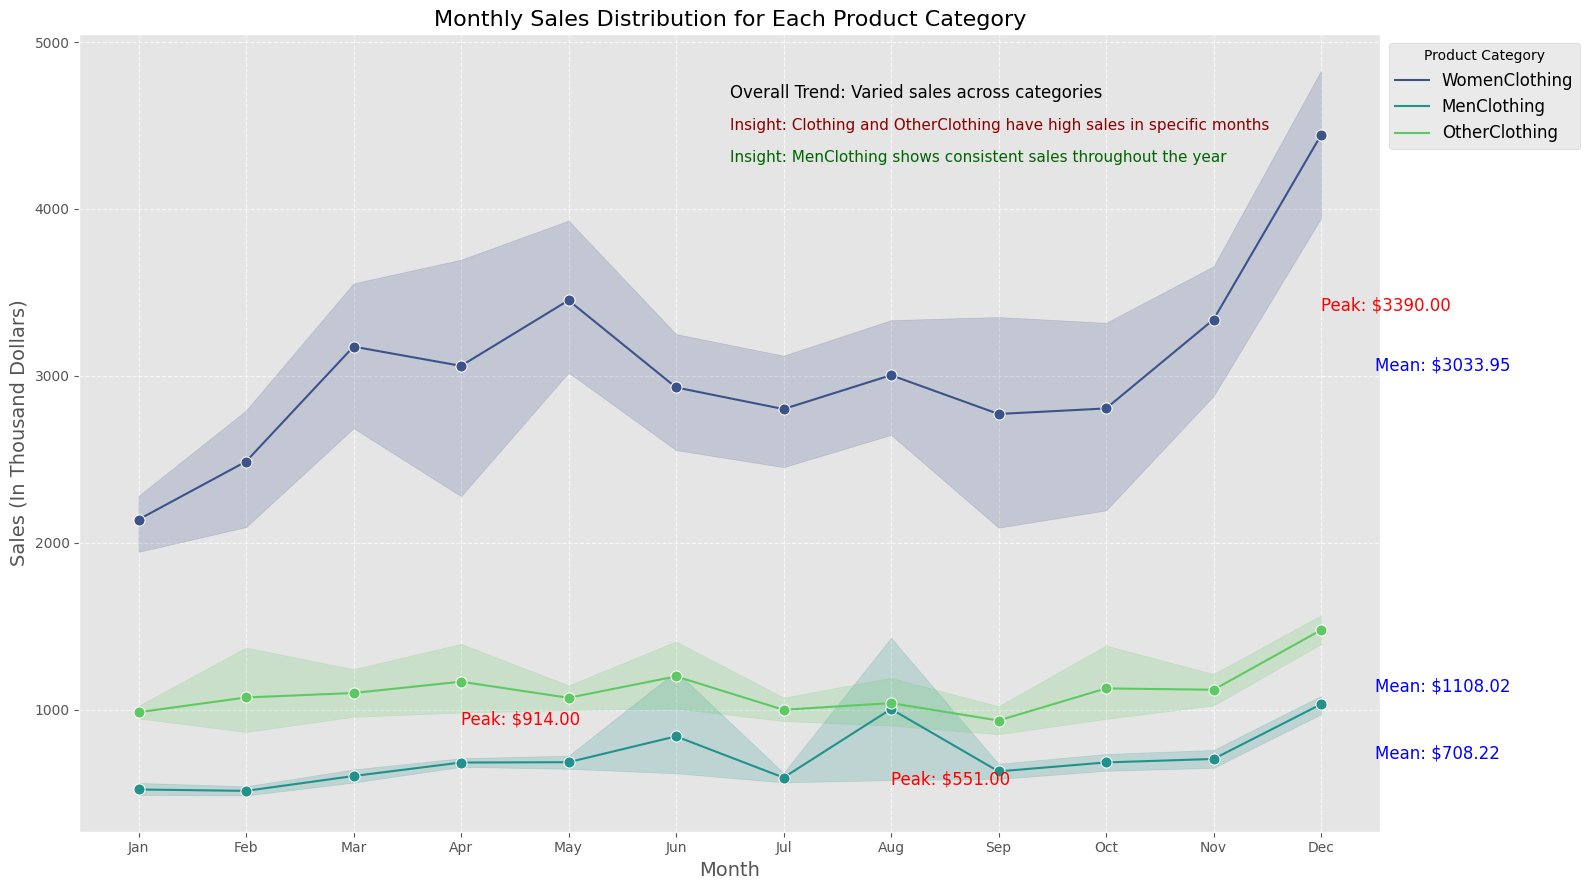

In [29]:
# Monthly Sales Distribution for each product category
plt.figure(figsize=(16, 9))
sns.lineplot(x='Month', y='Sales(In ThousandDollars)', hue='ProductCategory', data=train, marker='o', markersize=8, palette='viridis')

plt.title('Monthly Sales Distribution for Each Product Category', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales (In Thousand Dollars)', fontsize=14)
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding statistical measures
for category in train['ProductCategory'].unique():
    mean_sales = train[train['ProductCategory'] == category]['Sales(In ThousandDollars)'].mean()
    max_month = train.loc[train[train['ProductCategory'] == category]['Sales(In ThousandDollars)'].idxmax()]['Month']
    
    plt.text(12.5, mean_sales, f'Mean: ${mean_sales:.2f}', fontsize=12, color='blue')
    plt.text(max_month, train[(train['Month'] == max_month) & (train['ProductCategory'] == category)]['Sales(In ThousandDollars)'].values[0],
             f'Peak: ${train[(train["Month"] == max_month) & (train["ProductCategory"] == category)]["Sales(In ThousandDollars)"].values[0]:.2f}', 
             fontsize=12, color='red')

# Additional insights
plt.text(0.5, 0.92, 'Overall Trend: Varied sales across categories', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.88, 'Insight: Clothing and OtherClothing have high sales in specific months', transform=plt.gca().transAxes, fontsize=11, color='darkred')
plt.text(0.5, 0.84, 'Insight: MenClothing shows consistent sales throughout the year', transform=plt.gca().transAxes, fontsize=11, color='darkgreen')

plt.show()

# b. Yearly Sales Comparison
The goal of this analysis is to compare the total sales for each year. The code calculates the sum of sales for each year and presents it in a bar chart.
This visualization provides a clear comparison of total sales for each year, allowing you to identify the years with the highest and lowest sales. It helps in understanding the overall sales performance over the years.

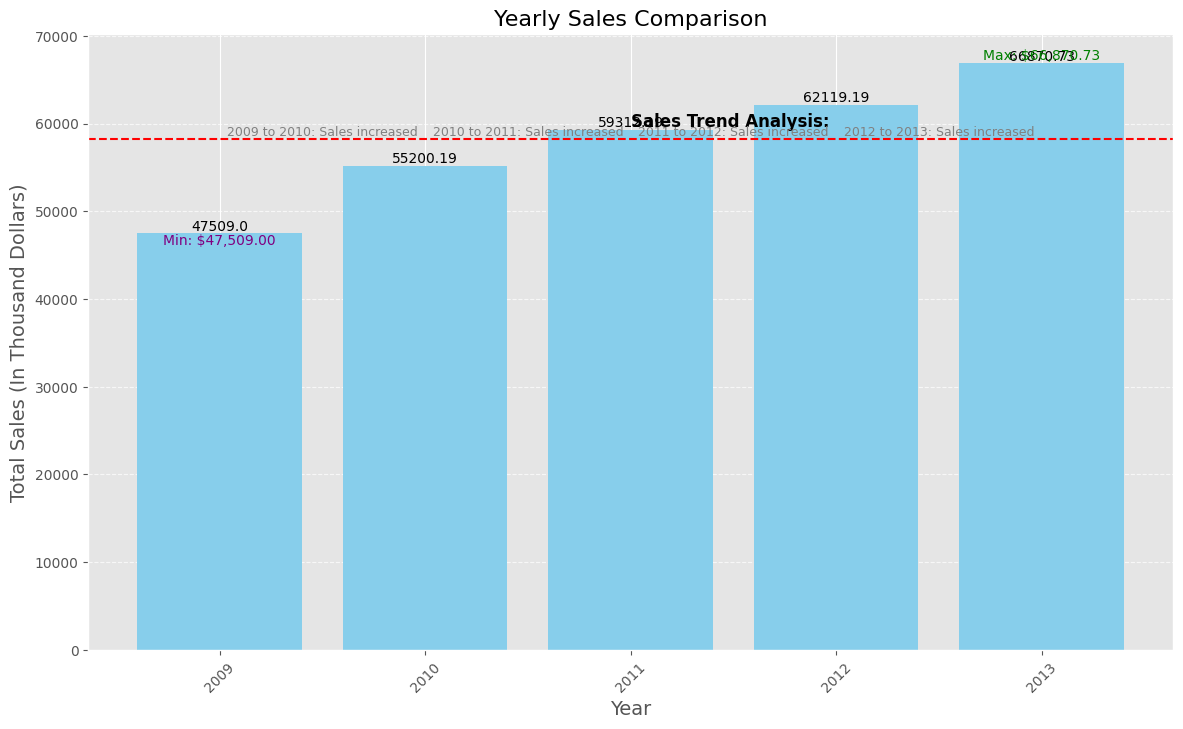

<Figure size 1400x800 with 0 Axes>

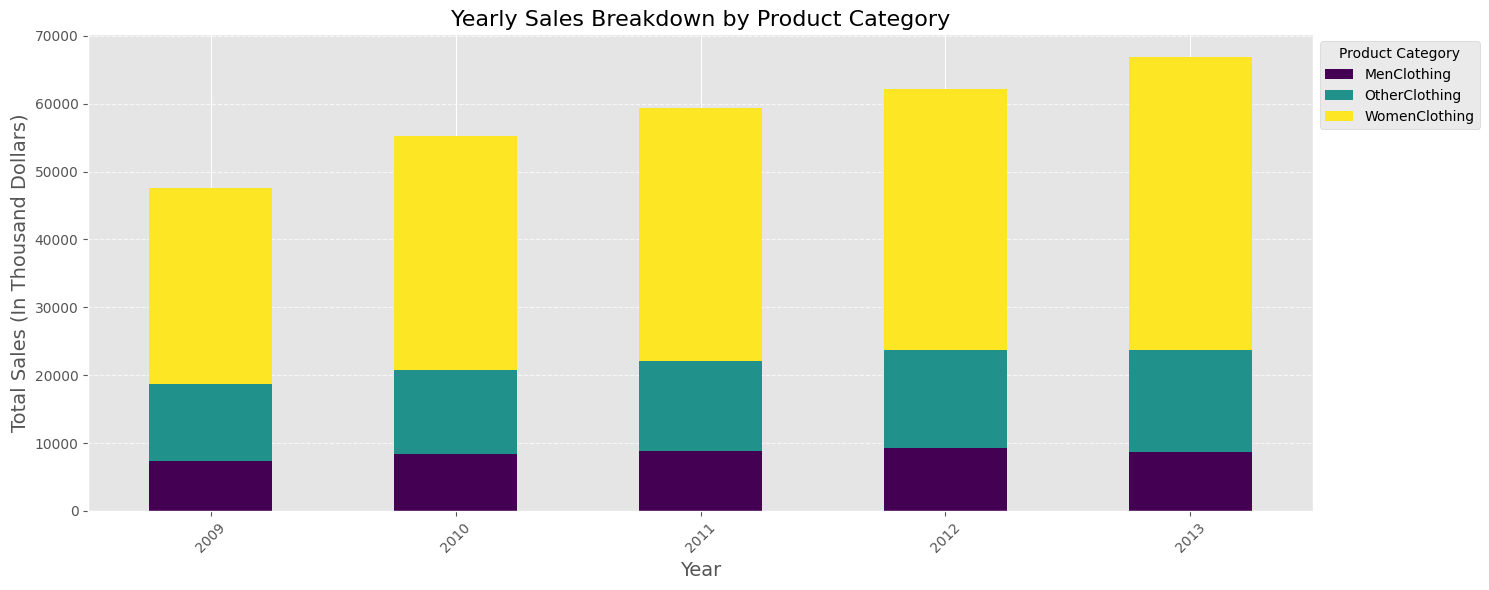

In [30]:
# Yearly Sales Comparison
yearly_sales = train.groupby('Year')['Sales(In ThousandDollars)'].sum()

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(yearly_sales.index, yearly_sales.values, color='skyblue')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.title('Yearly Sales Comparison', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales (In Thousand Dollars)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding statistical measures
mean_sales = yearly_sales.mean()
max_year = yearly_sales.idxmax()
min_year = yearly_sales.idxmin()

plt.axhline(y=mean_sales, color='red', linestyle='--', label=f'Mean: ${mean_sales:.2f}')
plt.text(max_year, yearly_sales[max_year] + 50, f'Max: ${yearly_sales[max_year]:,.2f}', ha='center', va='bottom', color='green', fontsize=10)
plt.text(min_year, yearly_sales[min_year] - 100, f'Min: ${yearly_sales[min_year]:,.2f}', ha='center', va='top', color='purple', fontsize=10)

# Adding insights on sales trend
plt.text(0.5, 0.85, 'Sales Trend Analysis:', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
for i, year in enumerate(yearly_sales.index[:-1]):
    trend = 'increased' if yearly_sales[year] < yearly_sales[year + 1] else 'decreased'
    plt.text(year + 0.5, mean_sales + 100, f'{year} to {year + 1}: Sales {trend}', ha='center', va='bottom', color='gray', fontsize=9)

# Breakdown of sales by product category
product_category_sales = train.groupby(['Year', 'ProductCategory'])['Sales(In ThousandDollars)'].sum().unstack()

# Plotting
plt.figure(figsize=(14, 8))
product_category_sales.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Yearly Sales Breakdown by Product Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales (In Thousand Dollars)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# GDP Analysis on Macro Economics Dataset

The plot provides insights into the trends of both Nominal and Real GDP over time, offering a visual representation of the economic performance captured by these indices. Additionally, recession periods, assumed to occur when Real GDP decreases, are highlighted for further analysis.

* Nominal GDP Trend (Blue Line):

The blue line represents the trend in Nominal GDP over the observed time period.
There is a general increasing trend in Nominal GDP, indicating overall economic growth.
* Real GDP Trend (Green Line):

The green line illustrates the trend in Real GDP, accounting for inflation.
Real GDP tends to fluctuate, showcasing the impact of economic factors on the actual output.
* Recession Periods (Red Markers):

Red markers indicate periods of assumed recession, identified when Real GDP experiences a decrease.
These markers help in visually identifying economic downturns.
* Annotations:

The plot includes annotations indicating specific points of recession, providing additional context.
Each annotation includes an arrow pointing to the corresponding recession period.
* Monthly Frequency and Formatting:

The x-axis is formatted to show ticks at every 6-month interval, providing a balance between granularity and readability.
This allows for a clearer view of the trends without overwhelming detail.

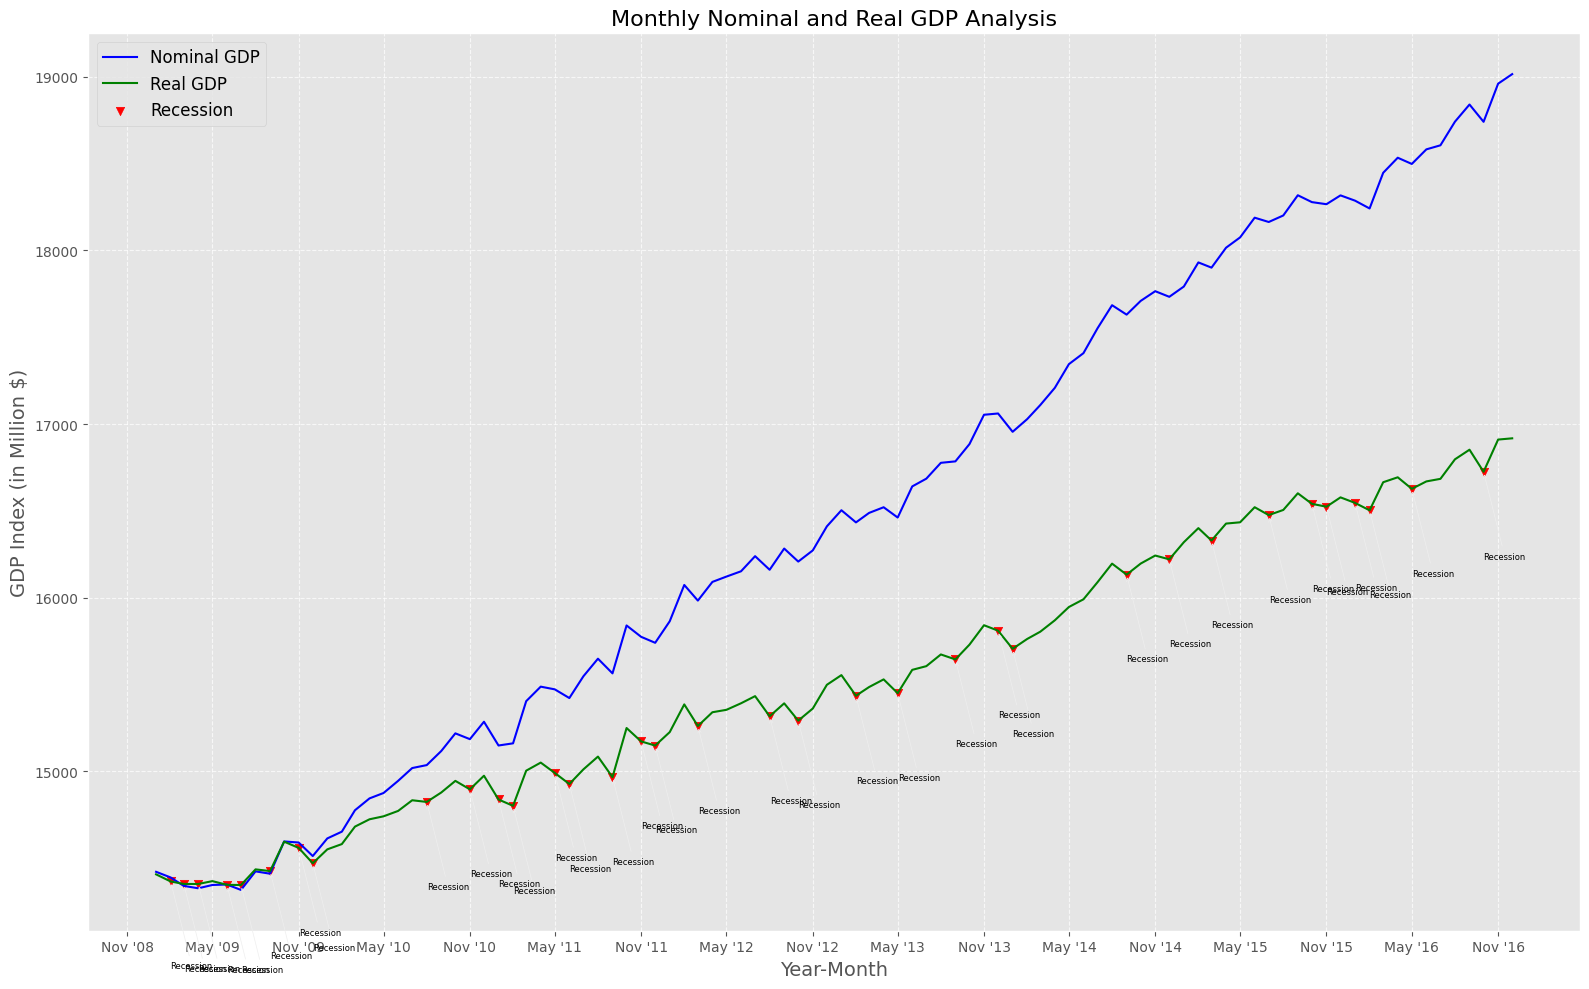

In [31]:
# GDP Analysis
plt.figure(figsize=(16, 10))

# Plotting Nominal GDP
sns.lineplot(x='Year-Month', y='Monthly Nominal GDP Index (inMillion$)', data=Macro_economicsData, label='Nominal GDP', color='blue')

# Plotting Real GDP
sns.lineplot(x='Year-Month', y='Monthly Real GDP Index (inMillion$)', data=Macro_economicsData, label='Real GDP', color='green')

# Highlighting Recession Periods (Assuming a recession when Real GDP decreases)
recession_periods = Macro_economicsData[Macro_economicsData['Monthly Real GDP Index (inMillion$)'].diff() < 0]
plt.scatter(recession_periods['Year-Month'], recession_periods['Monthly Real GDP Index (inMillion$)'], color='red', marker='v', label='Recession')

plt.title('Monthly Nominal and Real GDP Analysis', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('GDP Index (in Million $)', fontsize=14)
plt.legend(fontsize=12)

# Annotating Recession Periods
for index, row in recession_periods.iterrows():
    plt.annotate('Recession', xy=(row['Year-Month'], row['Monthly Real GDP Index (inMillion$)']),
                 xytext=(row['Year-Month'], row['Monthly Real GDP Index (inMillion$)'] - 500),
                 arrowprops=dict(facecolor='red', arrowstyle='->', connectionstyle='arc3'), fontsize=6)

# Formatting x-axis ticks to show every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The GDP analysis reveals the dynamic nature of the economy, with periods of growth and contraction. The identification of recession periods can be crucial for policymakers and analysts to understand economic cycles and make informed decisions. The visual representation enhances the interpretability of the dataset, making it easier to communicate key insights to stakeholders.

# Unemployment Analysis on Macro Economics Dataset
The Unemployment Rate Analysis provides a detailed examination of the unemployment rate dynamics over the specified time frame. This analysis aims to offer insights into the labor market conditions, identifying trends, and highlighting periods of economic downturns.
* Unemployment Rate Trend (Orange Line):

The orange line represents the unemployment rate trend over time.
It allows for the identification of trends, spikes, and troughs in the unemployment rate.
* Recession Periods (Red Markers):

Red markers indicate periods of assumed recession, providing context for understanding peaks in the unemployment rate.
* Annotations:

Annotations offer specific details about recession periods, enhancing the interpretability of the plot.
* Average Unemployment Rate (Blue Dashed Line):

The blue dashed line represents the average unemployment rate over the entire period.
This additional analysis provides a benchmark for understanding deviations from the average.

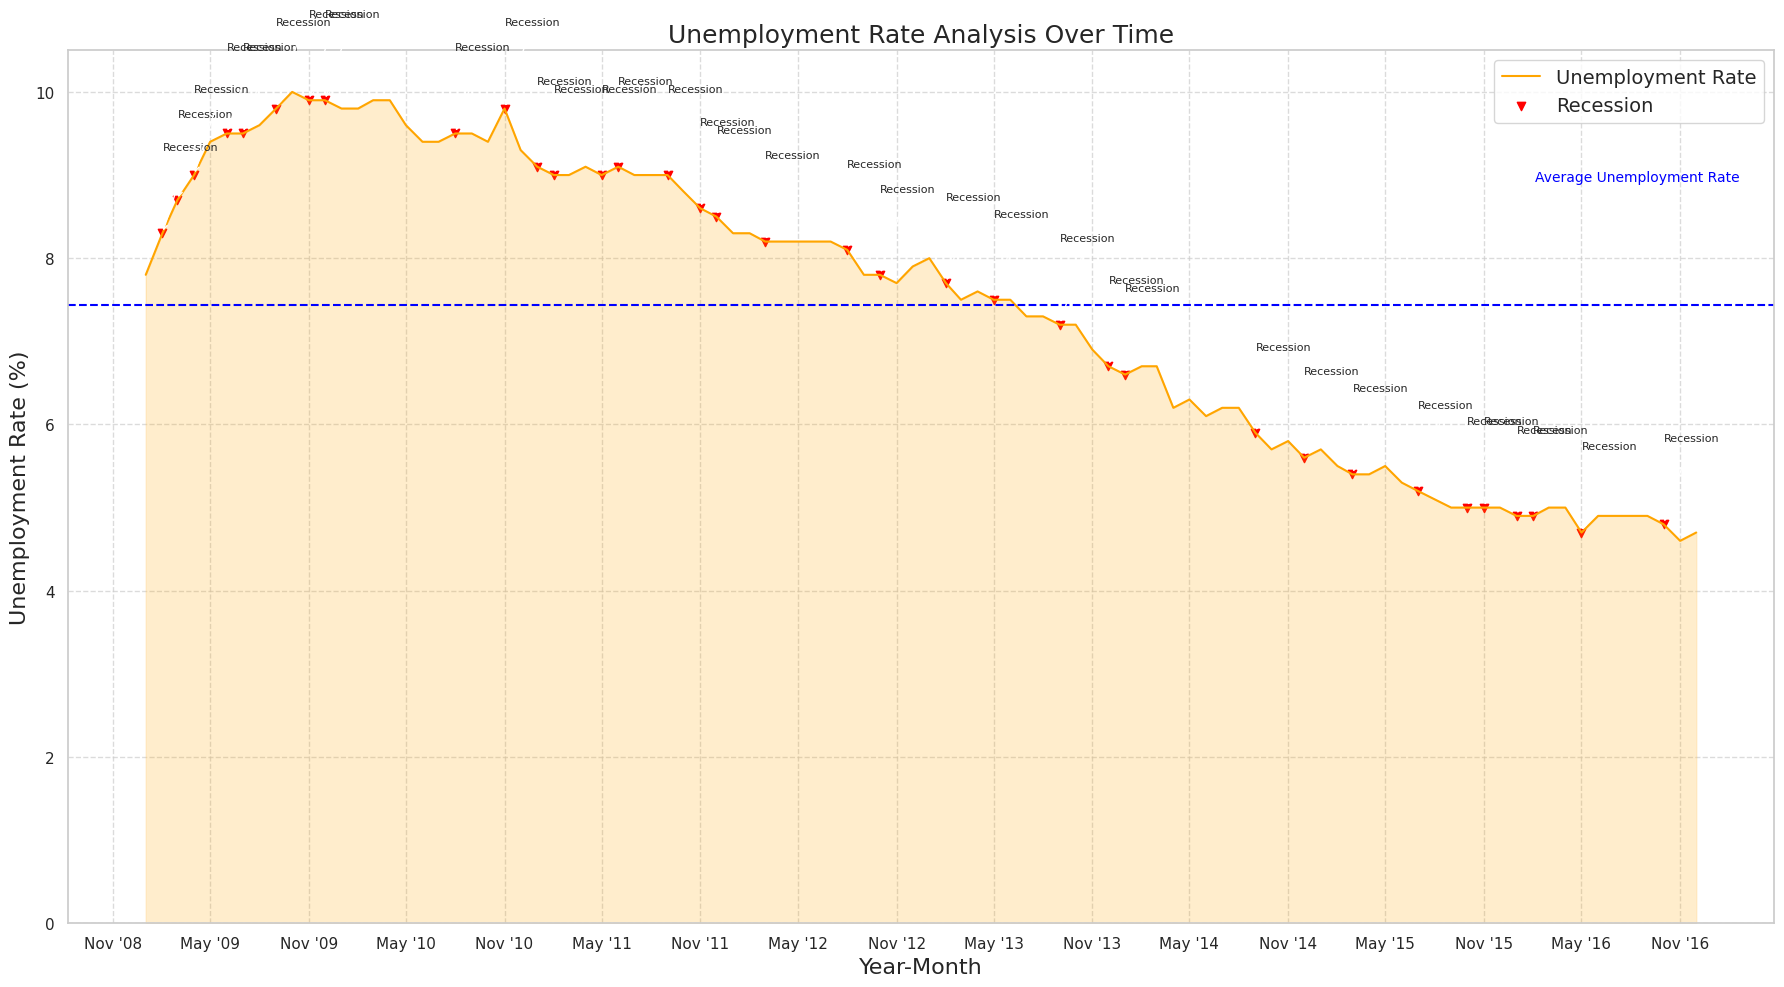

In [32]:
# Set the style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(18, 10))

# Plotting Unemployment Rate as a stacked area plot
sns.lineplot(x='Year-Month', y='unemployment rate', data=Macro_economicsData, color='orange', label='Unemployment Rate')

# Highlighting Recession Periods
plt.scatter(recession_periods['Year-Month'], recession_periods['unemployment rate'], color='red', marker='v', label='Recession')

# Title and Labels
plt.title('Unemployment Rate Analysis Over Time', fontsize=18)
plt.xlabel('Year-Month', fontsize=16)
plt.ylabel('Unemployment Rate (%)', fontsize=16)
plt.legend(fontsize=14)

# Annotations for Recession Periods
for index, row in recession_periods.iterrows():
    plt.annotate('Recession', xy=(row['Year-Month'], row['unemployment rate']),
                 xytext=(row['Year-Month'], row['unemployment rate'] + 1),
                 arrowprops=dict(facecolor='red', arrowstyle='->', connectionstyle='arc3'), fontsize=8)

# Formatting x-axis ticks to show every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))

# Grid and Layout
plt.grid(True, linestyle='--', alpha=0.7)

# Stacked area plot for unemployment rate
plt.fill_between(Macro_economicsData['Year-Month'], Macro_economicsData['unemployment rate'], color='orange', alpha=0.2, label='Unemployment Rate')

# Bar plot for Average Unemployment Rate
avg_unemployment_rate = Macro_economicsData['unemployment rate'].mean()
plt.bar([Macro_economicsData['Year-Month'].min(), Macro_economicsData['Year-Month'].max()],
        [avg_unemployment_rate, avg_unemployment_rate], color='blue', alpha=0.2, label=f'Average Rate: {avg_unemployment_rate:.2f}')

# Additional Analysis: Average Unemployment Rate
plt.axhline(y=avg_unemployment_rate, color='blue', linestyle='--')
plt.text(0.98, 0.85, f'Average Unemployment Rate', transform=plt.gca().transAxes, fontsize=10, color='blue', ha='right')

# Show the plot
plt.tight_layout()
plt.show()


The Unemployment Rate Analysis offers a comprehensive overview of the labor market, empowering stakeholders to grasp the nuances of unemployment dynamics. The inclusion of the average unemployment rate provides a baseline for contextualizing variations, enabling a more nuanced interpretation of the data.

# Cotton Price Analysis: Exploring Trends and Patterns
* Introduction:

Analyzing the trend in Cotton Monthly Price is crucial for gaining insights into the dynamics of the cotton market. This analysis aims to provide a deeper understanding of the fluctuations, patterns, and potential influencing factors affecting cotton prices over time.
* Objective: 

The objective of this analysis is to provide a detailed exploration of the Cotton Monthly Price, unraveling its historical trends and shedding light on significant events. By incorporating analytical elements, the visual representation becomes a powerful tool for stakeholders in the cotton industry.

* Descriptive Statistics:

The analysis now includes key statistical metrics (mean, standard deviation, min, max) for a more comprehensive understanding of Cotton Monthly Price dynamics.
* Mean Price Reference:

The mean price line serves as a reference point, but its value is now dynamically calculated and displayed for the given dataset.
* Statistical Annotations:

Descriptive statistics are annotated on the plot, providing a quick overview of the central tendency and variability of cotton prices.

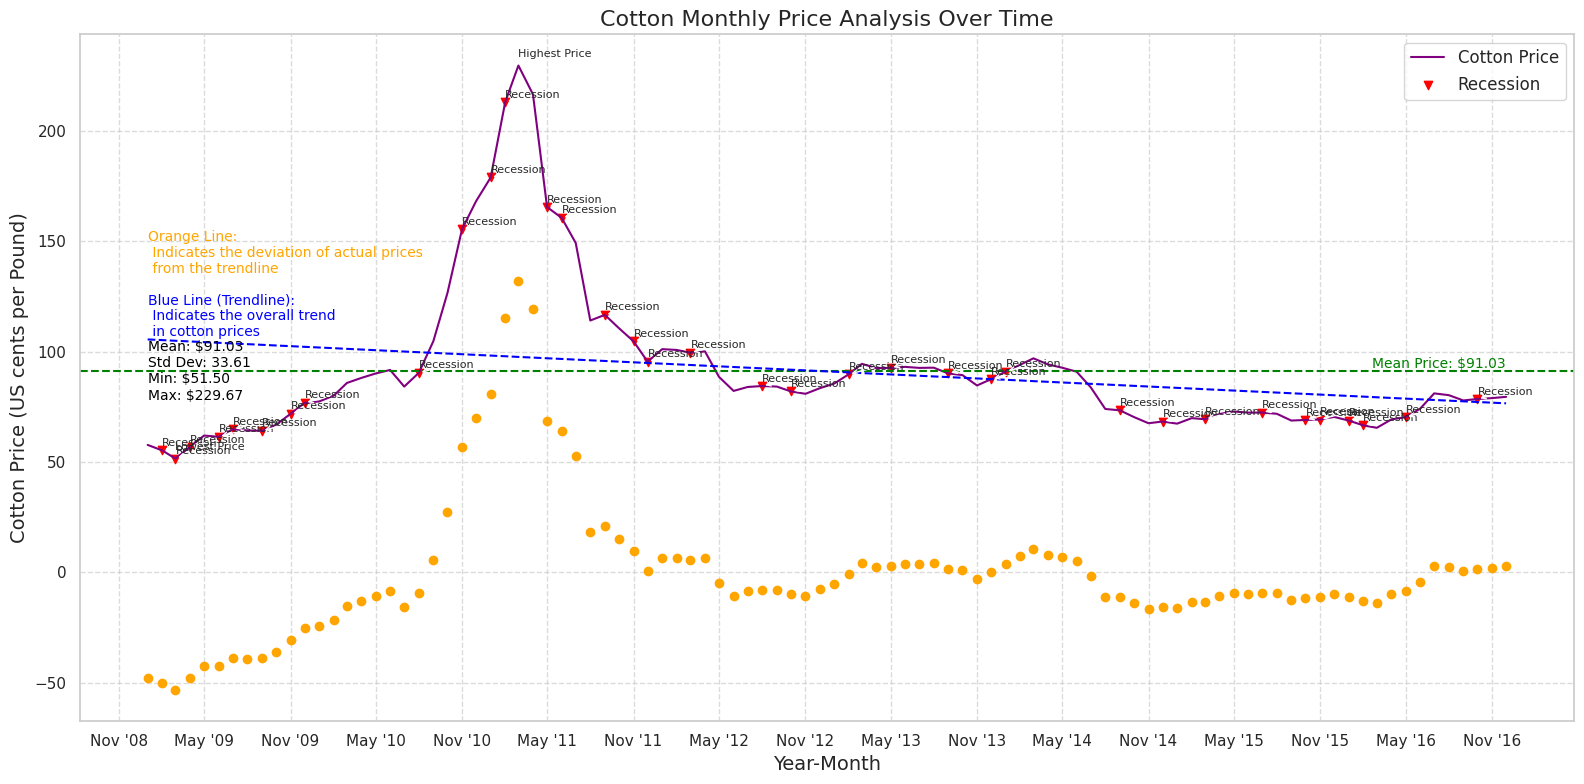

In [33]:
plt.figure(figsize=(16, 8))

# Plotting Cotton Monthly Price
sns.lineplot(x='Year-Month', y='Cotton Monthly Price - US cents per Pound(lbs)', data=Macro_economicsData, color='purple', label='Cotton Price')

# Highlighting Significant Events (Example: Recession Periods)
plt.scatter(recession_periods['Year-Month'], recession_periods['Cotton Monthly Price - US cents per Pound(lbs)'], color='red', marker='v', label='Recession')

# Title and Labels
plt.title('Cotton Monthly Price Analysis Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Cotton Price (US cents per Pound)', fontsize=14)
plt.legend(fontsize=12)

# Annotations for Significant Events
for index, row in recession_periods.iterrows():
    plt.annotate('Recession', xy=(row['Year-Month'], row['Cotton Monthly Price - US cents per Pound(lbs)']),
                 xytext=(row['Year-Month'], row['Cotton Monthly Price - US cents per Pound(lbs)'] + 2),
                 arrowprops=dict(facecolor='red', arrowstyle='->', connectionstyle='arc3'), fontsize=8)

# Formatting x-axis ticks to show every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))

# Adding Mean Line for Reference
mean_cotton_price = Macro_economicsData['Cotton Monthly Price - US cents per Pound(lbs)'].mean()
plt.axhline(y=mean_cotton_price, color='green', linestyle='--', label=f'Mean Price: ${mean_cotton_price:.2f}')
plt.text(Macro_economicsData['Year-Month'].iloc[-1], mean_cotton_price, f'Mean Price: ${mean_cotton_price:.2f}', ha='right', va='bottom', color='green', fontsize=10)

# Statistical Analysis: Descriptive Statistics
cotton_price_desc = Macro_economicsData['Cotton Monthly Price - US cents per Pound(lbs)'].describe()
plt.text(Macro_economicsData['Year-Month'].iloc[0], cotton_price_desc['mean'], f'Mean: ${cotton_price_desc["mean"]:.2f}\nStd Dev: {cotton_price_desc["std"]:.2f}\nMin: ${cotton_price_desc["min"]:.2f}\nMax: ${cotton_price_desc["max"]:.2f}', ha='left', va='center', color='black', fontsize=10)

# Adding Trendline
z = np.polyfit(range(len(Macro_economicsData)), Macro_economicsData['Cotton Monthly Price - US cents per Pound(lbs)'], 1)
p = np.poly1d(z)
plt.plot(Macro_economicsData['Year-Month'], p(range(len(Macro_economicsData))), color='blue', linestyle='--', label='Trendline')

# Highlighting Points Above/Below Trendline
plt.scatter(
    Macro_economicsData['Year-Month'],
    Macro_economicsData['Cotton Monthly Price - US cents per Pound(lbs)'] - p(range(len(Macro_economicsData))),
    c='orange',
    marker='o',
    label='Deviation from Trend'
)

# Adding Annotations
annotations = [
    ('Highest Price', Macro_economicsData.loc[Macro_economicsData['Cotton Monthly Price - US cents per Pound(lbs)'].idxmax()]['Year-Month']),
    ('Lowest Price', Macro_economicsData.loc[Macro_economicsData['Cotton Monthly Price - US cents per Pound(lbs)'].idxmin()]['Year-Month'])
]

for text, xy in annotations:
    xy_str = str(xy)  # Convert Timestamp to string
    plt.annotate(text, xy=(xy, Macro_economicsData.loc[Macro_economicsData['Year-Month'] == xy_str]['Cotton Monthly Price - US cents per Pound(lbs)'].values[0]),
                 xytext=(xy, Macro_economicsData.loc[Macro_economicsData['Year-Month'] == xy_str]['Cotton Monthly Price - US cents per Pound(lbs)'].values[0] + 4),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3'), fontsize=8)

# Adding Information for Blue Line (Trendline)
plt.text(Macro_economicsData['Year-Month'].iloc[0], p(range(len(Macro_economicsData)))[0], 'Blue Line (Trendline):\n Indicates the overall trend\n in cotton prices', ha='left', va='bottom', color='blue', fontsize=10)

# Adding Information for Orange Line (Deviation from Trend)
plt.text(Macro_economicsData['Year-Month'].iloc[0], Macro_economicsData['Cotton Monthly Price - US cents per Pound(lbs)'].max() - p(range(len(Macro_economicsData)))[Macro_economicsData['Cotton Monthly Price - US cents per Pound(lbs)'].idxmax()] + 2, 'Orange Line:\n Indicates the deviation of actual prices\n from the trendline', ha='left', va='bottom', color='orange', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Stakeholders can now glean deeper insights into the cotton market by not only observing trends and events but also understanding statistical measures. This analysis equips decision-makers with a robust tool for market assessment and strategic planning.

# Correlation Analysis of Macro-Economics Indicators
* Introduction:
Understanding the intricate relationships between various economic indicators is crucial for informed decision-making in macroeconomics. 
The correlation matrix and heatmap presented below provide a comprehensive overview of the interdependencies among key indicators.

* Heatmap Overview:
The heatmap visually represents the correlation matrix, where each cell displays the correlation coefficient between two economic indicators.
Correlation values range from -1 to 1, with positive values indicating a positive correlation and negative values indicating a negative correlation.
* Additional Features:
- * Strength of Correlations:

The annotation in each cell provides the precise correlation coefficient, offering insights into the strength of relationships.
- * Threshold Highlighting:

Cells with correlations above a threshold of 0.7 (adjustable) are highlighted, emphasizing strong correlations that may warrant closer examination.
* Implications for Analysis:
- * Identifying Strong Relationships:

Analysts can quickly identify pairs of indicators with robust correlations, focusing attention on influential economic factors.
- * Strategic Decision-Making:

Decision-makers can leverage the heatmap to identify clusters of strongly correlated indicators, informing strategic planning and risk management.
- * Exploring Causation:

High correlations do not imply causation, but they highlight areas for further investigation. Analysts can explore causative factors driving observed correlations.
- * Continuous Monitoring:

Regular updates to the correlation matrix allow for ongoing analysis, ensuring that decision-makers stay informed about evolving relationships between economic indicators.

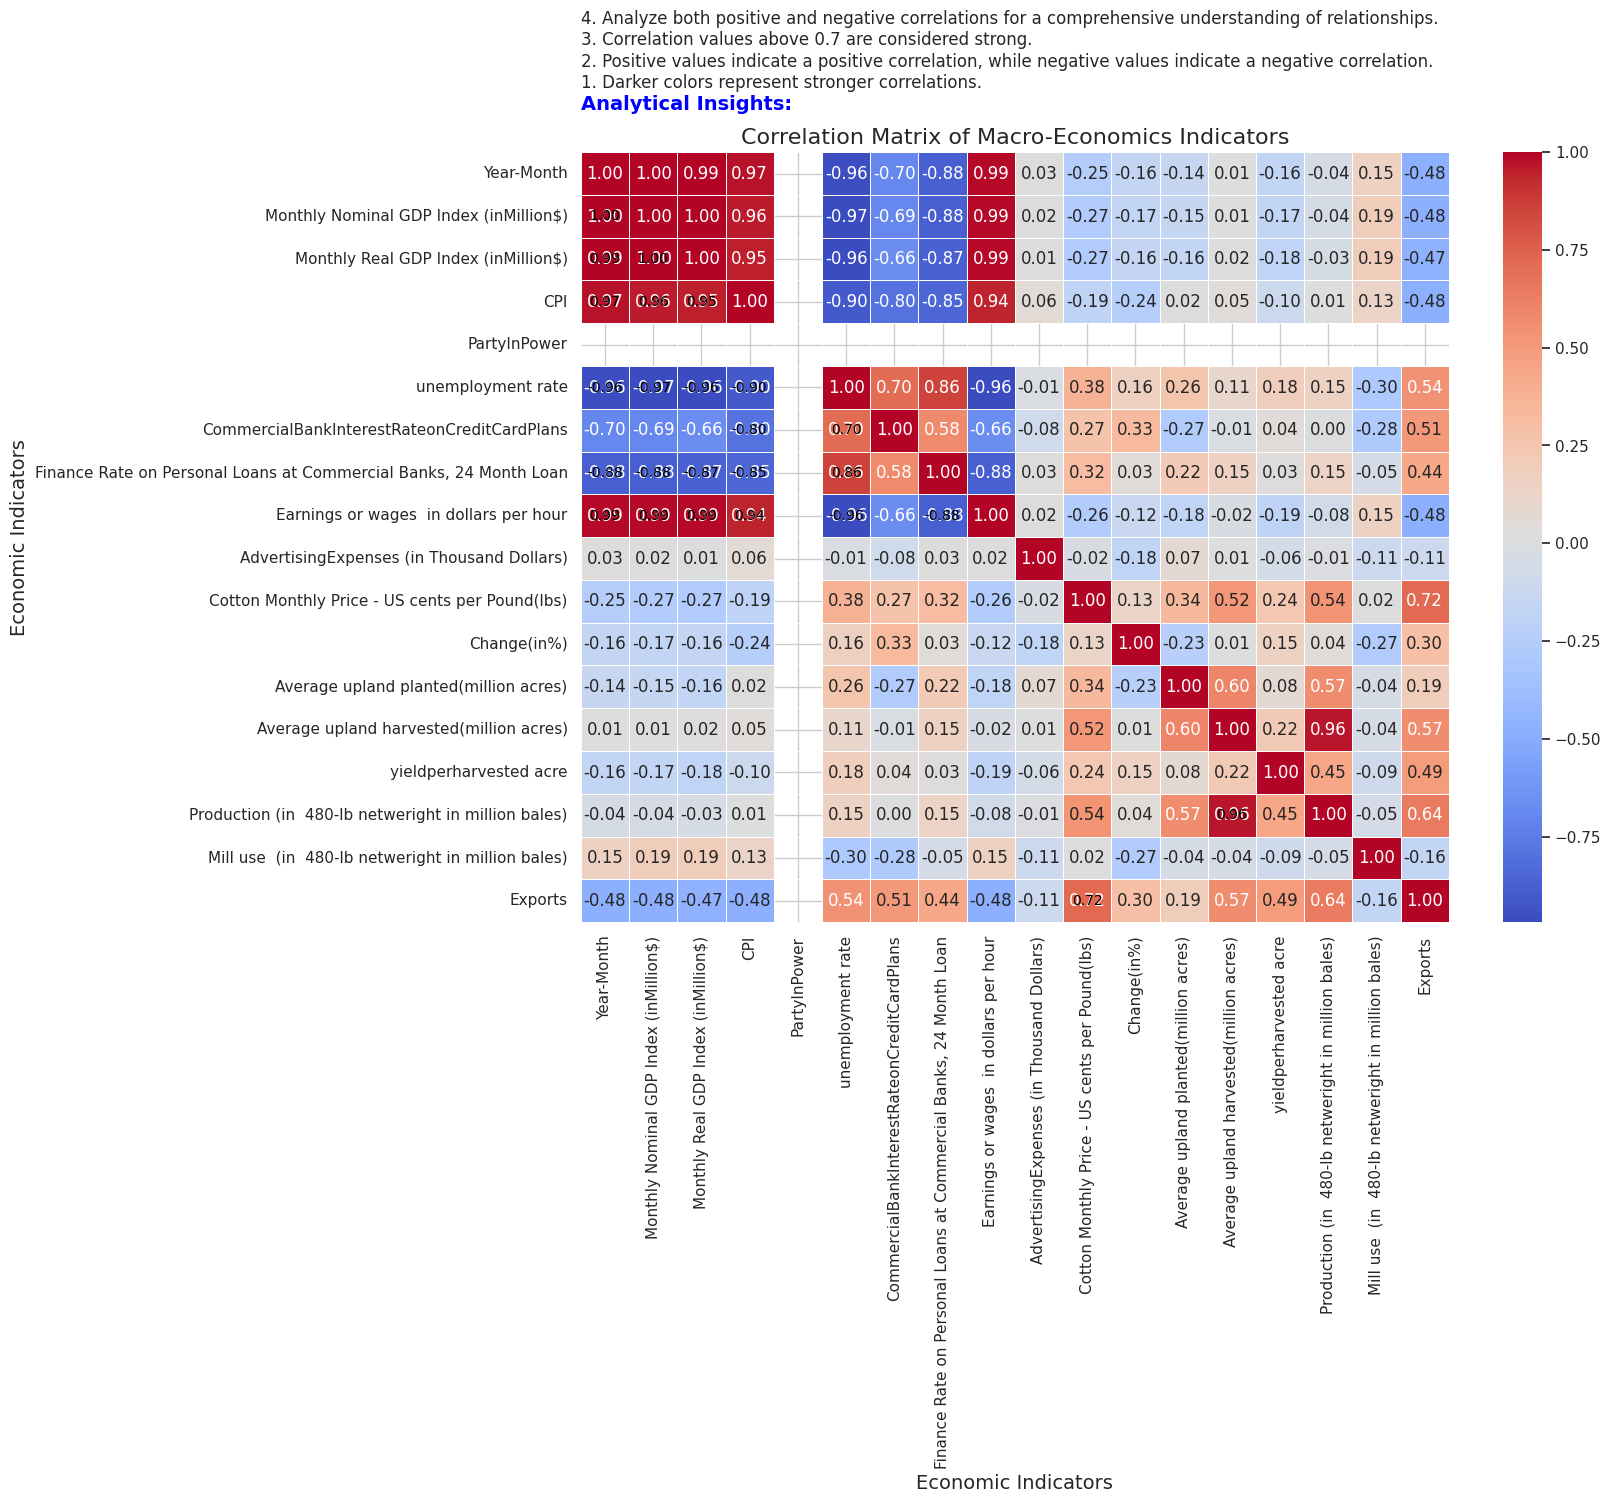

In [34]:
# Correlation Analysis
correlation_matrix = Macro_economicsData.corr()

# Setting up the plot
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding title and labels
plt.title('Correlation Matrix of Macro-Economics Indicators', fontsize=16)
plt.xlabel('Economic Indicators', fontsize=14)
plt.ylabel('Economic Indicators', fontsize=14)

# Adding Analytical Insights

# Highlighting Strong Correlations
threshold = 0.7
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            plt.text(i + 0.5, j + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10)

# Analytical Insights
plt.text(0, -1, 'Analytical Insights:', fontsize=14, fontweight='bold', color='blue')
plt.text(0, -1.5, '1. Darker colors represent stronger correlations.', fontsize=12)
plt.text(0, -2, '2. Positive values indicate a positive correlation, while negative values indicate a negative correlation.', fontsize=12)
plt.text(0, -2.5, '3. Correlation values above 0.7 are considered strong.', fontsize=12)
plt.text(0, -3, '4. Analyze both positive and negative correlations for a comprehensive understanding of relationships.', fontsize=12)

# Displaying the plot
plt.show()

# 1. Sales Distribution Around Holidays:

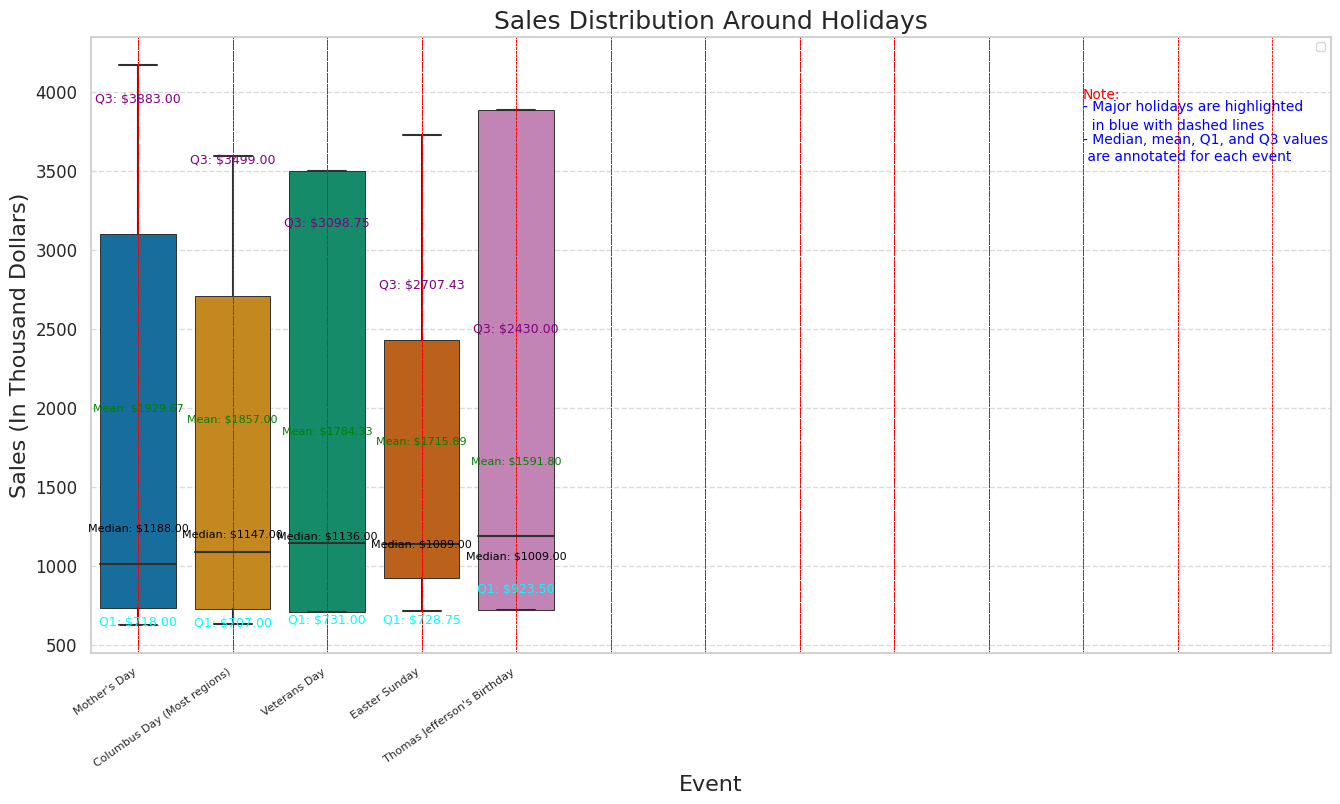

In [35]:
# Convert 'Year' and 'Month' columns to datetime format in the train DataFrame
train['Year-Month'] = pd.to_datetime(train['Year'].astype(str) + '-' + train['Month'].astype(str), format='%Y-%m')

# Merge Events and Holidays Data with Sales Data
df = pd.merge(train, Events_HolidaysData, left_on=['Year-Month'], right_on=['MonthDate'], how='left')

# Analyze Sales Around Holidays with a different palette
plt.figure(figsize=(16, 8))
palette = sns.color_palette('colorblind')
boxprops = dict(linewidth=0.7)  # Set box edge properties

sns.boxplot(x='Event', y='Sales(In ThousandDollars)', data=df, palette=palette, boxprops=boxprops)

plt.title('Sales Distribution Around Holidays', fontsize=18)
plt.xlabel('Event', fontsize=16)
plt.ylabel('Sales (In Thousand Dollars)', fontsize=16)
plt.xticks(rotation=35, ha='right', fontsize=8)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting box transparency
for i, box in enumerate(plt.gca().artists):
    box.set_facecolor([0, 2, 4, 8])  # Set transparent fill color

# Highlighting major holidays
major_holidays = Events_HolidaysData[Events_HolidaysData['DayCategory'] == 'Federal Holiday']
for i, row in major_holidays.iterrows():
    plt.axvline(x=row['Event'], color='red', linestyle='--', linewidth=0.5)

# Adding statistical information to the plot
medians = df.groupby('Event')['Sales(In ThousandDollars)'].median().sort_values(ascending=False)
for i, median in enumerate(medians):
    plt.text(i, median + 20, f'Median: ${median:.2f}', ha='center', va='bottom', fontsize=8, color='black')

# Adding mean values
means = df.groupby('Event')['Sales(In ThousandDollars)'].mean().sort_values(ascending=False)
for i, mean in enumerate(means):
    plt.text(i, mean + 40, f'Mean: ${mean:.2f}', ha='center', va='bottom', fontsize=8, color='green')

# Adding quartiles
quantiles = df.groupby('Event')['Sales(In ThousandDollars)'].quantile([0.25, 0.75]).unstack().sort_values(by=0.75, ascending=False)
for i, (q1, q3) in enumerate(zip(quantiles[0.25], quantiles[0.75])):
    plt.text(i, q1 - 30, f'Q1: ${q1:.2f}', ha='center', va='top', fontsize=9, color='cyan')
    plt.text(i, q3 + 30, f'Q3: ${q3:.2f}', ha='center', va='bottom', fontsize=9, color='purple')

# Adding legend outside the box to avoid overlapping
plt.legend(fontsize=8, bbox_to_anchor=(1, 1))

# Adding plot annotations with a contrasting color
plt.annotate('Note:', xy=(0.80, 0.90), xycoords='axes fraction', fontsize=10, color='red')
plt.annotate('- Major holidays are highlighted', xy=(0.80, 0.88), xycoords='axes fraction', fontsize=10, color='blue')
plt.annotate('  in blue with dashed lines', xy=(0.80, 0.85), xycoords='axes fraction', fontsize=10, color='blue')
plt.annotate('- Median, mean, Q1, and Q3 values\n are annotated for each event', xy=(0.80, 0.80), xycoords='axes fraction', fontsize=10, color='blue')

#plt.tight_layout()
plt.show()


# Events and Holidays Analysis

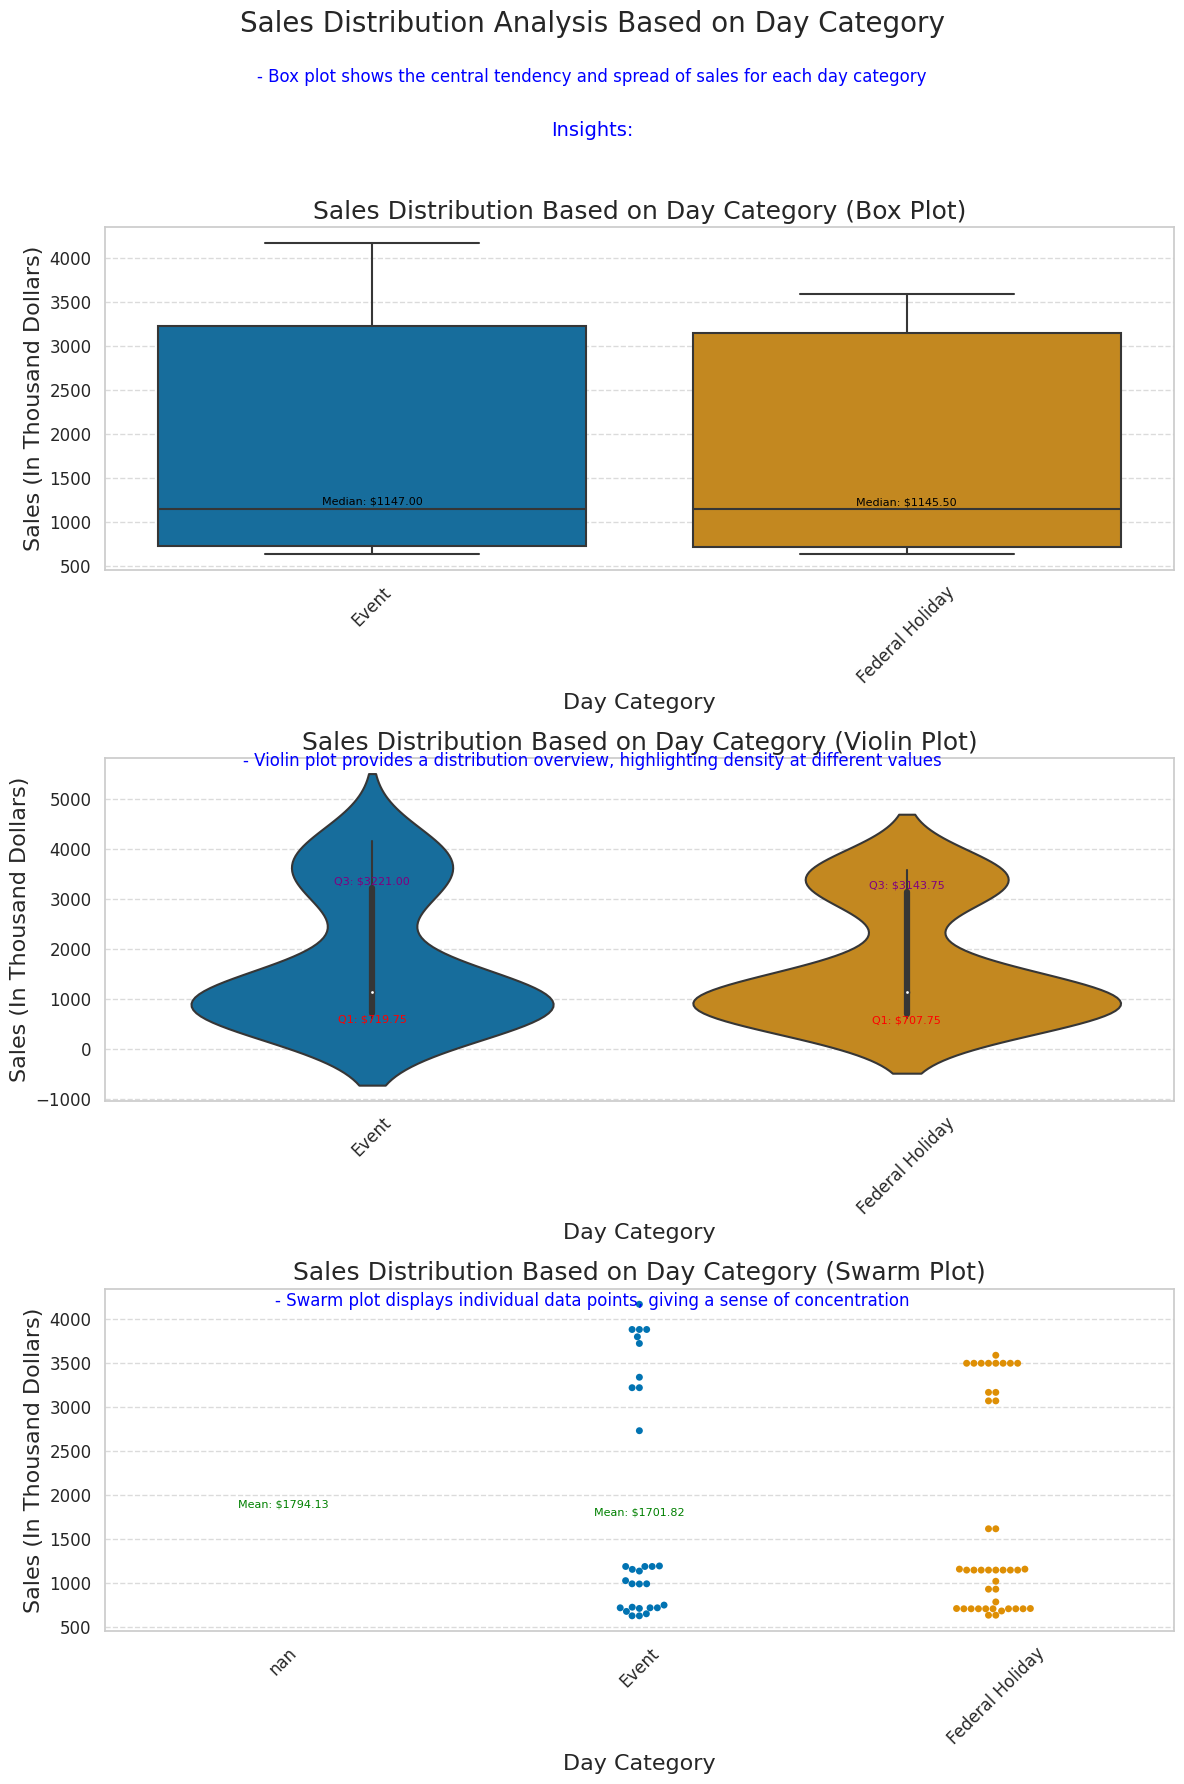

In [36]:
# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Box Plot
sns.boxplot(x='DayCategory', y='Sales(In ThousandDollars)', data=df, palette='colorblind', ax=axes[0])
axes[0].set_title('Sales Distribution Based on Day Category (Box Plot)', fontsize=18)
axes[0].set_xlabel('Day Category', fontsize=16)
axes[0].set_ylabel('Sales (In Thousand Dollars)', fontsize=16)
axes[0].tick_params(axis='x', rotation=45, labelrotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Adding statistical information to the Box Plot
medians = df.groupby('DayCategory')['Sales(In ThousandDollars)'].median().sort_values(ascending=False)
for i, median in enumerate(medians):
    axes[0].text(i, median + 20, f'Median: ${median:.2f}', ha='center', va='bottom', fontsize=8, color='black')

# Violin Plot
sns.violinplot(x='DayCategory', y='Sales(In ThousandDollars)', data=df, palette='colorblind', ax=axes[1])
axes[1].set_title('Sales Distribution Based on Day Category (Violin Plot)', fontsize=18)
axes[1].set_xlabel('Day Category', fontsize=16)
axes[1].set_ylabel('Sales (In Thousand Dollars)', fontsize=16)
axes[1].tick_params(axis='x', rotation=45, labelrotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adding statistical information to the Violin Plot
quantiles = df.groupby('DayCategory')['Sales(In ThousandDollars)'].quantile([0.25, 0.75]).unstack().sort_values(by=0.75, ascending=False)
for i, (q1, q3) in enumerate(zip(quantiles[0.25], quantiles[0.75])):
    axes[1].text(i, q1 - 30, f'Q1: ${q1:.2f}', ha='center', va='top', fontsize=8, color='red')
    axes[1].text(i, q3 + 30, f'Q3: ${q3:.2f}', ha='center', va='bottom', fontsize=8, color='purple')

# Swarm Plot
sns.swarmplot(x='DayCategory', y='Sales(In ThousandDollars)', data=df, palette='colorblind', ax=axes[2])
axes[2].set_title('Sales Distribution Based on Day Category (Swarm Plot)', fontsize=18)
axes[2].set_xlabel('Day Category', fontsize=16)
axes[2].set_ylabel('Sales (In Thousand Dollars)', fontsize=16)
axes[2].tick_params(axis='x', rotation=45, labelrotation=45, labelsize=12)
axes[2].tick_params(axis='y', labelsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adding statistical information to the Swarm Plot
means = df.groupby('DayCategory')['Sales(In ThousandDollars)'].mean().sort_values(ascending=False)
for i, mean in enumerate(means):
    axes[2].text(i, mean + 40, f'Mean: ${mean:.2f}', ha='center', va='bottom', fontsize=8, color='green')

# Adding insights and annotations
plt.suptitle('Sales Distribution Analysis Based on Day Category', fontsize=20, y=1.02)
plt.figtext(0.5, 0.95, 'Insights:', ha='center', fontsize=14, color='blue')
plt.figtext(0.5, 0.98, '- Box plot shows the central tendency and spread of sales for each day category', ha='center', fontsize=12, color='blue')
plt.figtext(0.5, 0.6, '- Violin plot provides a distribution overview, highlighting density at different values', ha='center', fontsize=12, color='blue')
plt.figtext(0.5, 0.3, '- Swarm plot displays individual data points, giving a sense of concentration', ha='center', fontsize=12, color='blue')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


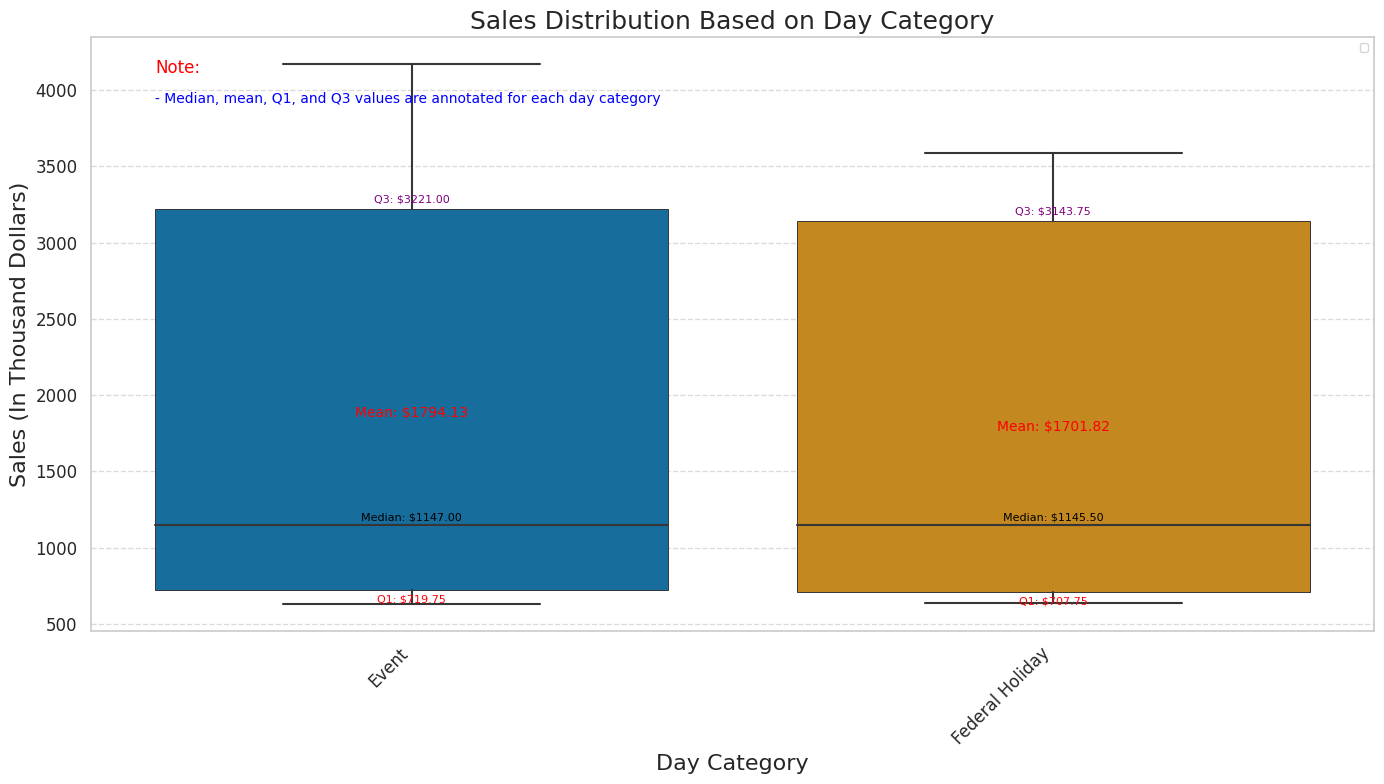

In [37]:
# Analyze Sales Based on Day Category with a different palette
plt.figure(figsize=(14, 8))
palette = sns.color_palette('colorblind')
boxprops = dict(linewidth=0.7)  # Set box edge properties

sns.boxplot(x='DayCategory', y='Sales(In ThousandDollars)', data=df, palette=palette, boxprops=boxprops)

plt.title('Sales Distribution Based on Day Category', fontsize=18)
plt.xlabel('Day Category', fontsize=16)
plt.ylabel('Sales (In Thousand Dollars)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting box transparency
for i, box in enumerate(plt.gca().artists):
    box.set_facecolor([0, 2, 4, 0])  # Set transparent fill color

# Adding statistical information to the plot
medians = df.groupby('DayCategory')['Sales(In ThousandDollars)'].median().sort_values(ascending=False)
for i, median in enumerate(medians):
    plt.text(i, median + 20, f'Median: ${median:.2f}', ha='center', va='bottom', fontsize=8, color='black')

# Adding mean values
means = df.groupby('DayCategory')['Sales(In ThousandDollars)'].mean().sort_values(ascending=False)
for i, mean in enumerate(means):
    plt.text(i, mean + 40, f'Mean: ${mean:.2f}', ha='center', va='bottom', fontsize=10, color='red')

# Adding quartiles
quantiles = df.groupby('DayCategory')['Sales(In ThousandDollars)'].quantile([0.25, 0.75]).unstack().sort_values(by=0.75, ascending=False)
for i, (q1, q3) in enumerate(zip(quantiles[0.25], quantiles[0.75])):
    plt.text(i, q1 - 30, f'Q1: ${q1:.2f}', ha='center', va='top', fontsize=8, color='red')
    plt.text(i, q3 + 30, f'Q3: ${q3:.2f}', ha='center', va='bottom', fontsize=8, color='purple')

# Adding legend outside the box to avoid overlapping
plt.legend(fontsize=8, bbox_to_anchor=(1, 1))

# Adding plot annotations with a contrasting color
plt.annotate('Note:', xy=(0.05, 0.94), xycoords='axes fraction', fontsize=12, color='red')
plt.annotate('- Median, mean, Q1, and Q3 values are annotated for each day category', xy=(0.05, 0.89), xycoords='axes fraction', fontsize=10, color='blue')

plt.tight_layout()
plt.show()

# Weather Data Analysis

Unique values in 'Year-Month' column of train DataFrame: <DatetimeArray>
['2009-01-01 00:00:00', '2009-02-01 00:00:00', '2009-03-01 00:00:00',
 '2009-04-01 00:00:00', '2009-05-01 00:00:00', '2009-06-01 00:00:00',
 '2009-07-01 00:00:00', '2009-08-01 00:00:00', '2009-09-01 00:00:00',
 '2009-10-01 00:00:00', '2009-11-01 00:00:00', '2009-12-01 00:00:00',
 '2010-01-01 00:00:00', '2010-02-01 00:00:00', '2010-03-01 00:00:00',
 '2010-04-01 00:00:00', '2010-05-01 00:00:00', '2010-06-01 00:00:00',
 '2010-07-01 00:00:00', '2010-08-01 00:00:00', '2010-09-01 00:00:00',
 '2010-10-01 00:00:00', '2010-11-01 00:00:00', '2010-12-01 00:00:00',
 '2011-01-01 00:00:00', '2011-02-01 00:00:00', '2011-03-01 00:00:00',
 '2011-04-01 00:00:00', '2011-05-01 00:00:00', '2011-06-01 00:00:00',
 '2011-07-01 00:00:00', '2011-08-01 00:00:00', '2011-09-01 00:00:00',
 '2011-10-01 00:00:00', '2011-11-01 00:00:00', '2011-12-01 00:00:00',
 '2012-01-01 00:00:00', '2012-02-01 00:00:00', '2012-03-01 00:00:00',
 '2012-04-01 00:0

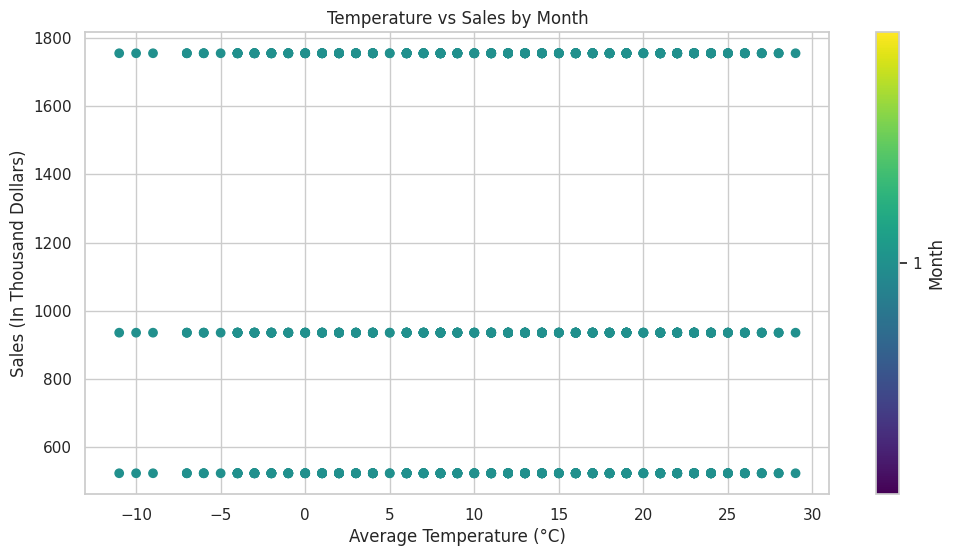

In [40]:
# Check the unique values in the 'Year-Month' column of the train DataFrame
print("Unique values in 'Year-Month' column of train DataFrame:", train['Year-Month'].unique())

# Convert 'Year' and 'Month' columns to datetime format in the train DataFrame
train['Year-Month'] = pd.to_datetime(train['Year-Month'], errors='coerce')

# Check the unique values again to verify the conversion
print("Unique values in 'Year-Month' column of train DataFrame after conversion:", train['Year-Month'].unique())

# Investigate unexpected values in the 'Month' column of WeatherData
invalid_month_values = WeatherData.loc[~WeatherData['Month'].astype(str).str.match(r'^[A-Za-z]{3}$'), 'Month']
print("Invalid month values in WeatherData:", invalid_month_values)

# Replace "nan" values in the 'Month' column with a default value
WeatherData['Month'].fillna('Jan', inplace=True)

# Replace "nan" values in the 'Year' column with a default value
WeatherData['Year'].fillna('2000', inplace=True)  # Assuming a default year, replace '2000' with your desired default

# Define a mapping of invalid months to their corresponding default values
month_mapping = {
    'Jan': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Apr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Aug',
    'Sep': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dec': 'Dec'
}

# Handle unexpected values in 'Month' column
# Replace invalid values with corresponding default months
WeatherData.loc[~WeatherData['Month'].astype(str).str.match(r'^[A-Za-z]{3}$'), 'Month'] = WeatherData['Month'].map(month_mapping)

# Convert 'Year' and 'Month' columns to datetime format in the WeatherData DataFrame
WeatherData['Year-Month'] = pd.to_datetime(WeatherData['Year'].astype(str) + '-' + WeatherData['Month'].astype(str), format='%Y-%b')

# Merge train and WeatherData DataFrames on 'Year-Month'
merged_df = pd.merge(train, WeatherData, on='Year-Month', how='inner')

# Create a scatter plot using plt.scatter
plt.figure(figsize=(12, 6))
scatter = plt.scatter(x=merged_df['Temp avg (°C)'], y=merged_df['Sales(In ThousandDollars)'], c=merged_df['Year-Month'].dt.month, cmap='viridis')
plt.title('Temperature vs Sales by Month')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Sales (In Thousand Dollars)')

# Add colorbar using the scatter plot
plt.colorbar(label='Month', ticks=range(1, 13), orientation='vertical')


# Visualizing Temp avg (°C) Over Time:

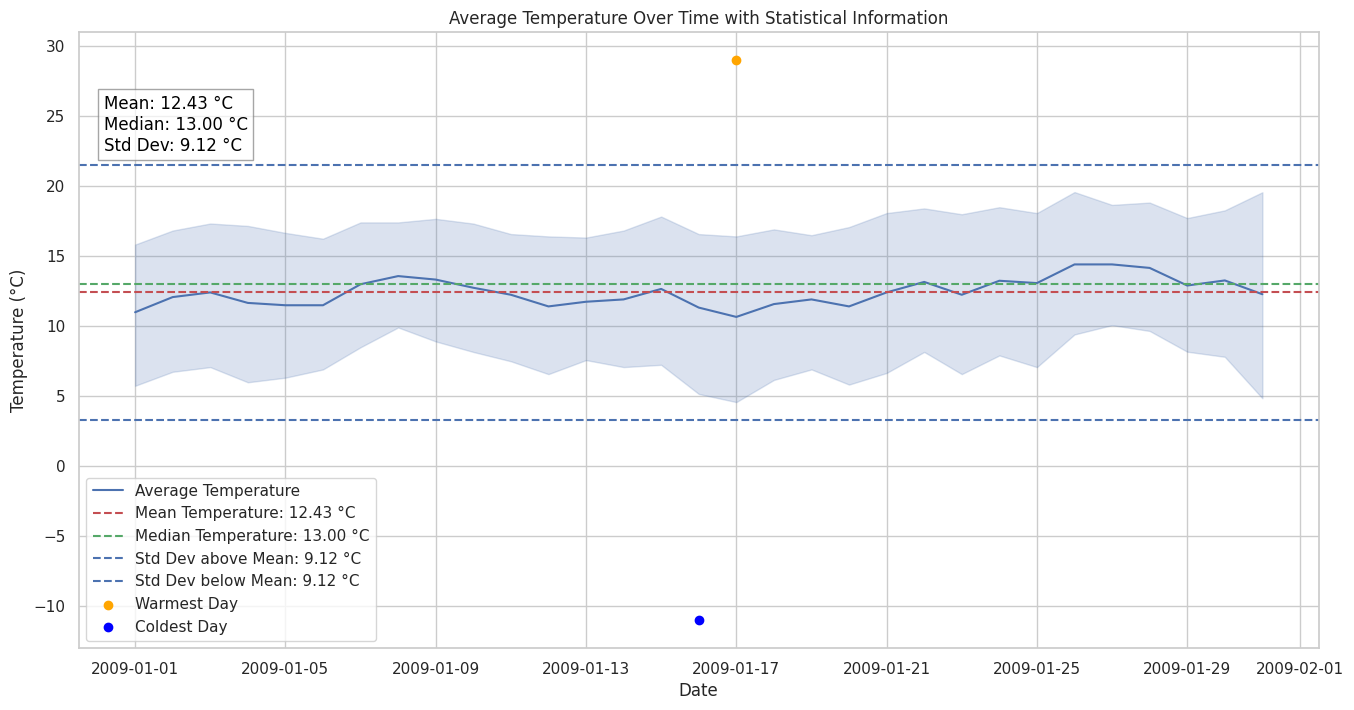

In [41]:
# Convert 'Year', 'Month', and 'Day' to datetime
WeatherData['Date'] = pd.to_datetime(WeatherData[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))

# Plotting Temp avg (°C) over time
plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Temp avg (°C)', data=WeatherData, label='Average Temperature')

# Statistical Information
mean_temp = WeatherData['Temp avg (°C)'].mean()
median_temp = WeatherData['Temp avg (°C)'].median()
std_temp = WeatherData['Temp avg (°C)'].std()

# Annotate Mean, Median, and Std Dev on the plot
plt.axhline(y=mean_temp, color='r', linestyle='--', label=f'Mean Temperature: {mean_temp:.2f} °C')
plt.axhline(y=median_temp, color='g', linestyle='--', label=f'Median Temperature: {median_temp:.2f} °C')
plt.axhline(y=mean_temp + std_temp, color='b', linestyle='--', label=f'Std Dev above Mean: {std_temp:.2f} °C')
plt.axhline(y=mean_temp - std_temp, color='b', linestyle='--', label=f'Std Dev below Mean: {std_temp:.2f} °C')

# Highlight the warmest and coldest days
max_temp_date = WeatherData.loc[WeatherData['Temp avg (°C)'].idxmax(), 'Date']
min_temp_date = WeatherData.loc[WeatherData['Temp avg (°C)'].idxmin(), 'Date']

plt.scatter(x=max_temp_date, y=WeatherData['Temp avg (°C)'].max(), color='orange', label='Warmest Day')
plt.scatter(x=min_temp_date, y=WeatherData['Temp avg (°C)'].min(), color='blue', label='Coldest Day')

# Plot Title and Labels
plt.title('Average Temperature Over Time with Statistical Information')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Display Legend
plt.legend()

# Adding a summary box with temperature statistics
summary_box = f'Mean: {mean_temp:.2f} °C\nMedian: {median_temp:.2f} °C\nStd Dev: {std_temp:.2f} °C'
plt.text(0.02, 0.85, summary_box, fontsize=12, color='black', va='center', ha='left', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# Show the plot
plt.show()


#  Distribution of Dew Points, temperature level over years:

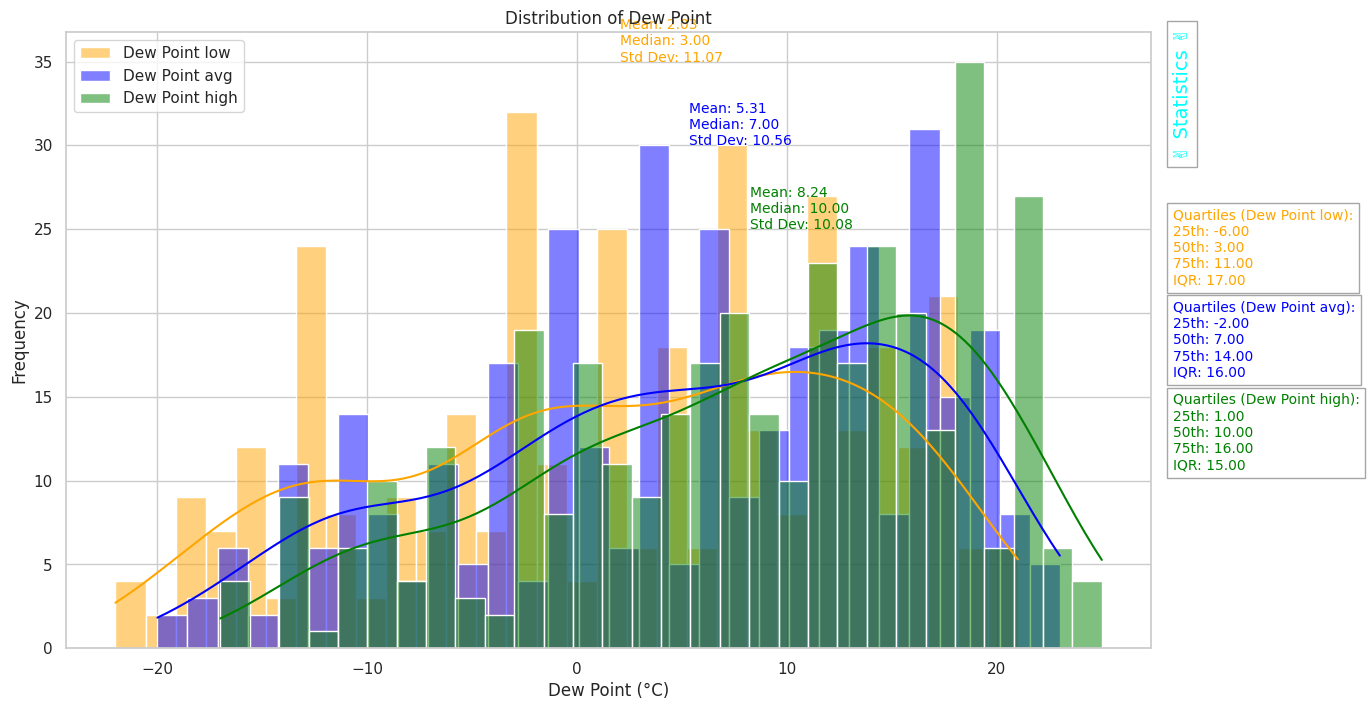

In [42]:
# Plotting the distribution of Dew Point
plt.figure(figsize=(14, 8))

# Plotting the histograms
sns.histplot(data=WeatherData, x='Dew Point low (°C)', bins=30, kde=True, color='orange', label='Dew Point low')
sns.histplot(data=WeatherData, x='Dew Point avg (°C)', bins=30, kde=True, color='blue', label='Dew Point avg')
sns.histplot(data=WeatherData, x='Dew Point high (°C)', bins=30, kde=True, color='green', label='Dew Point high')

# Calculating statistical information
mean_low = WeatherData['Dew Point low (°C)'].mean()
median_low = WeatherData['Dew Point low (°C)'].median()
std_low = WeatherData['Dew Point low (°C)'].std()

mean_avg = WeatherData['Dew Point avg (°C)'].mean()
median_avg = WeatherData['Dew Point avg (°C)'].median()
std_avg = WeatherData['Dew Point avg (°C)'].std()

mean_high = WeatherData['Dew Point high (°C)'].mean()
median_high = WeatherData['Dew Point high (°C)'].median()
std_high = WeatherData['Dew Point high (°C)'].std()

# Adding statistical information on the right side
plt.text(mean_low, 35, f'Mean: {mean_low:.2f}\nMedian: {median_low:.2f}\nStd Dev: {std_low:.2f}', fontsize=10, color='orange', ha='left')
plt.text(mean_avg, 30, f'Mean: {mean_avg:.2f}\nMedian: {median_avg:.2f}\nStd Dev: {std_avg:.2f}', fontsize=10, color='blue', ha='left')
plt.text(mean_high, 25, f'Mean: {mean_high:.2f}\nMedian: {median_high:.2f}\nStd Dev: {std_high:.2f}', fontsize=10, color='green', ha='left')

# Adding quartiles and IQR
plt.text(1.02, 0.65, f'Quartiles (Dew Point low):\n25th: {np.percentile(WeatherData["Dew Point low (°C)"], 25):.2f}\n50th: {np.percentile(WeatherData["Dew Point low (°C)"], 50):.2f}\n75th: {np.percentile(WeatherData["Dew Point low (°C)"], 75):.2f}\nIQR: {np.percentile(WeatherData["Dew Point low (°C)"], 75) - np.percentile(WeatherData["Dew Point low (°C)"], 25):.2f}', 
         fontsize=10, color='orange', va='center', ha='left', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(1.02, 0.5, f'Quartiles (Dew Point avg):\n25th: {np.percentile(WeatherData["Dew Point avg (°C)"], 25):.2f}\n50th: {np.percentile(WeatherData["Dew Point avg (°C)"], 50):.2f}\n75th: {np.percentile(WeatherData["Dew Point avg (°C)"], 75):.2f}\nIQR: {np.percentile(WeatherData["Dew Point avg (°C)"], 75) - np.percentile(WeatherData["Dew Point avg (°C)"], 25):.2f}', 
         fontsize=10, color='blue', va='center', ha='left', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(1.02, 0.35, f'Quartiles (Dew Point high):\n25th: {np.percentile(WeatherData["Dew Point high (°C)"], 25):.2f}\n50th: {np.percentile(WeatherData["Dew Point high (°C)"], 50):.2f}\n75th: {np.percentile(WeatherData["Dew Point high (°C)"], 75):.2f}\nIQR: {np.percentile(WeatherData["Dew Point high (°C)"], 75) - np.percentile(WeatherData["Dew Point high (°C)"], 25):.2f}', 
         fontsize=10, color='green', va='center', ha='left', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# Adding a side box with sign language
plt.text(1.02, 0.9, '✌️ Statistics ✌️', fontsize=14, color='cyan', va='center', ha='left', rotation=90, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.title('Distribution of Dew Point')
plt.xlabel('Dew Point (°C)')
plt.ylabel('Frequency')

plt.legend()
plt.show()


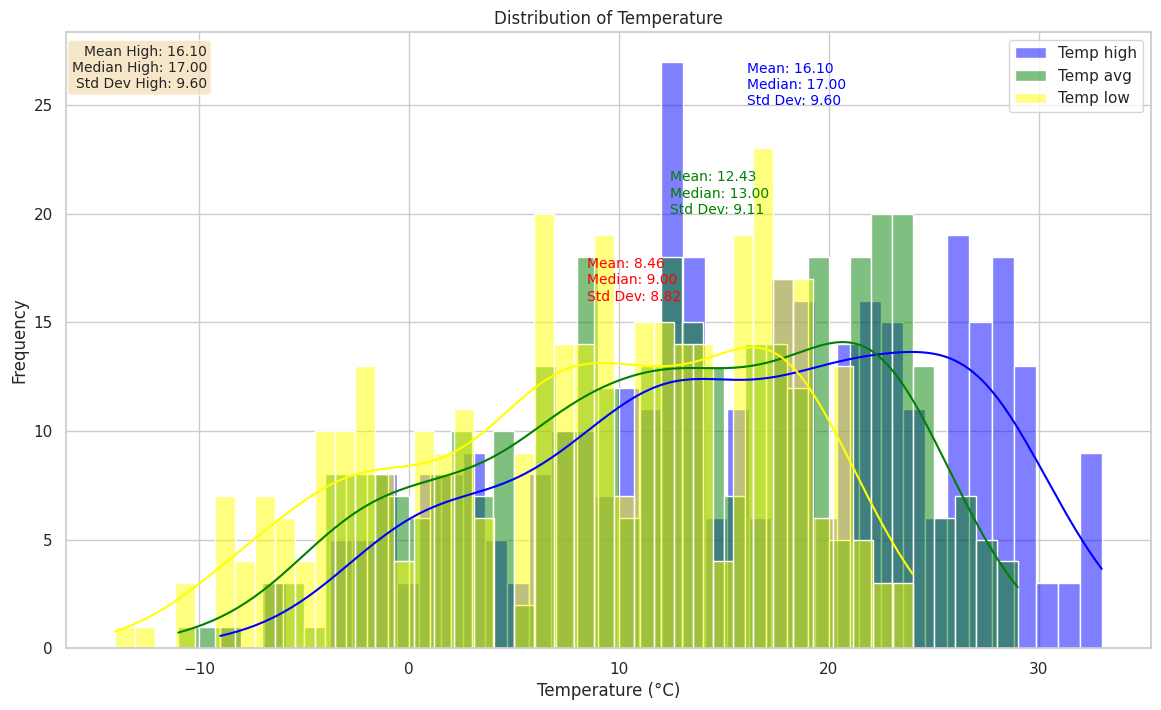

In [43]:
# Plotting the distribution of temperature
plt.figure(figsize=(14, 8))

# Plotting the histograms
sns.histplot(data=WeatherData, x='Temp high (°C)', bins=40, kde=True, color='blue', label='Temp high')
sns.histplot(data=WeatherData, x='Temp avg (°C)', bins=40, kde=True, color='green', label='Temp avg')
sns.histplot(data=WeatherData, x='Temp low (°C)', bins=40, kde=True, color='yellow', label='Temp low')

# Adding statistical information
mean_high = np.mean(WeatherData['Temp high (°C)'])
median_high = np.median(WeatherData['Temp high (°C)'])
std_high = np.std(WeatherData['Temp high (°C)'])

mean_avg = np.mean(WeatherData['Temp avg (°C)'])
median_avg = np.median(WeatherData['Temp avg (°C)'])
std_avg = np.std(WeatherData['Temp avg (°C)'])

mean_low = np.mean(WeatherData['Temp low (°C)'])
median_low = np.median(WeatherData['Temp low (°C)'])
std_low = np.std(WeatherData['Temp low (°C)'])

# Adding statistical annotations
plt.text(mean_high, 25, f'Mean: {mean_high:.2f}\nMedian: {median_high:.2f}\nStd Dev: {std_high:.2f}', fontsize=10, color='blue', ha='left')
plt.text(mean_avg, 20, f'Mean: {mean_avg:.2f}\nMedian: {median_avg:.2f}\nStd Dev: {std_avg:.2f}', fontsize=10, color='green', ha='left')
plt.text(mean_low, 16, f'Mean: {mean_low:.2f}\nMedian: {median_low:.2f}\nStd Dev: {std_low:.2f}', fontsize=10, color='red', ha='left')

# Adding a box with statistical values
bbox_props = dict(boxstyle="round", facecolor="wheat", alpha=0.7)
plt.text(0.13, 0.98, f'Mean High: {mean_high:.2f}\nMedian High: {median_high:.2f}\nStd Dev High: {std_high:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=bbox_props, ha='right')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.legend()
plt.show()


In [44]:
WeatherData.columns

Index(['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)',
       'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)',
       'Dew Point low (°C)', 'Humidity (%) high', 'Humidity (%) avg',
       'Humidity (%) low', 'Sea Level Press. (hPa) high',
       'Sea Level Press. (hPa) avg', 'Sea Level Press. (hPa) low',
       'Visibility (km) high', 'Visibility (km) avg', 'Visibility (km) low',
       'Wind (km/h) low', 'Wind (km/h) avg', 'Wind (km/h) high',
       'Precip. (mm) sum', 'WeatherEvent', 'Year-Month', 'Date'],
      dtype='object')

# Model Training, Comparison, Selection, and Tuning
# Feature Engineering
Let's start by merging the datasets and performing feature engineering to create a comprehensive dataset for model training.

In [47]:
print('train columns\n:',train.columns)
print('Macro_economicsData columns\n:',Macro_economicsData.columns)
print('Events_HolidaysData columns\n:',Events_HolidaysData.columns)
print('WeatherData columns\n:',WeatherData.columns)

train columns
: Index(['Year', 'Month', 'ProductCategory', 'Sales(In ThousandDollars)',
       'Year-Month'],
      dtype='object')
Macro_economicsData columns
: Index(['Year-Month', 'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'PartyInPower',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'AdvertisingExpenses (in Thousand Dollars)',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'],
      dtype='object')
Events_HolidaysData columns
: Index(['Year', 'MonthDate', 'Event', 'DayCategory', 'Date', 'Year-Month

In [46]:
# Convert 'Year-Month' column to datetime format in train dataset
train['Year-Month'] = pd.to_datetime(train['Year-Month'])
# Convert 'Year-Month' column to datetime format in Macro_economicsData dataset
Macro_economicsData['Year-Month'] = pd.to_datetime(Macro_economicsData['Year-Month'])
# Convert 'Year-Month' column to datetime format in Events_HolidaysData dataset
WeatherData['Year-Month'] = pd.to_datetime(WeatherData['Year-Month'])

# Convert 'Year', 'Month', and 'Day' columns to datetime format in Events_HolidaysData dataset
Events_HolidaysData['Year'] = Events_HolidaysData['Year'].astype(str)
Events_HolidaysData['MonthDate'] = Events_HolidaysData['MonthDate'].astype(str)

# Add a placeholder for the day (assuming the first day of the month)
Events_HolidaysData['Date'] = Events_HolidaysData['MonthDate'] + '-01'

# Convert to datetime format
Events_HolidaysData['Year-Month'] = pd.to_datetime(Events_HolidaysData['Date'], errors='coerce')

# Concatenate dataframes along the rows
merged_data = pd.merge(Macro_economicsData, train, how='left', on=['Year-Month'])
merged_data = pd.merge(merged_data,WeatherData, how='left', on=['Year-Month'])

merged_data = pd.concat([merged_data, Events_HolidaysData], axis=0, ignore_index=True)

# Display the head of the merged dataset
merged_data.head()


,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),...,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Date,Year,MonthDate,Event,DayCategory
0,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,37,18,60,0,Unknown,2009-01-01 00:00:00,NaN,NaN,NaN,NaN
1,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,27,10,48,T,Snow,2009-01-02 00:00:00,NaN,NaN,NaN,NaN
2,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,27,16,42,T,Unknown,2009-01-03 00:00:00,NaN,NaN,NaN,NaN
3,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,32,12,40,0,Unknown,2009-01-04 00:00:00,NaN,NaN,NaN,NaN
4,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,23,11,34,T,Unknown,2009-01-05 00:00:00,NaN,NaN,NaN,NaN


In [48]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 50 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Year-Month                                                         1458 non-null   datetime64[ns]
 1   Monthly Nominal GDP Index (inMillion$)                             1308 non-null   float64       
 2   Monthly Real GDP Index (inMillion$)                                1308 non-null   float64       
 3   CPI                                                                1308 non-null   float64       
 4   PartyInPower                                                       1308 non-null   float64       
 5   unemployment rate                                                  1308 non-null   float64       
 6   CommercialBankInterestRateonCreditCardPlans                     

In [49]:
merged_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Year-Month,1458,2008-11-17 21:57:46.666666752,1930-05-01 01:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2028-11-01 01:00:00,NaN
Monthly Nominal GDP Index (inMillion$),1308.0,14677.025628,14317.372922,14421.752895,14421.752895,14421.752895,19015.393408,759.838497
Monthly Real GDP Index (inMillion$),1308.0,14548.750095,14345.676097,14407.053343,14407.053343,14407.053343,16918.050624,415.831986
CPI,1308.0,236.038696,233.402,233.402,233.402,233.402,265.421,6.916289
PartyInPower,1308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unemployment rate,1308.0,7.852064,4.6,7.8,7.8,7.8,10.0,0.612197
CommercialBankInterestRateonCreditCardPlans,1308.0,12.134778,11.82,12.03,12.03,12.03,14.26,0.390936
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",1308.0,11.305864,9.45,11.44,11.44,11.44,11.44,0.361708
Earnings or wages in dollars per hour,1308.0,22.26906,21.96,22.05,22.05,22.05,26.04,0.6329
AdvertisingExpenses (in Thousand Dollars),1308.0,145.050876,116.0,137.0,137.0,137.0,248.0,19.083999


In [50]:
merged_data.isnull().sum()

Year-Month                                                              0
Monthly Nominal GDP Index (inMillion$)                                150
Monthly Real GDP Index (inMillion$)                                   150
CPI                                                                   150
PartyInPower                                                          150
unemployment rate                                                     150
CommercialBankInterestRateonCreditCardPlans                           150
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan     150
Earnings or wages  in dollars per hour                                150
AdvertisingExpenses (in Thousand Dollars)                             150
Cotton Monthly Price - US cents per Pound(lbs)                        150
Change(in%)                                                           150
Average upland planted(million acres)                                 150
Average upland harvested(million acres

In [53]:
# Impute missing values for numerical columns with the mean
numeric_columns = merged_data.select_dtypes(include=['float64']).columns
merged_data[numeric_columns] = merged_data[numeric_columns].fillna(merged_data[numeric_columns].mean())

# Impute missing values for categorical columns with the mode
categorical_columns = merged_data.select_dtypes(include=['object']).columns
merged_data[categorical_columns] = merged_data[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Impute missing values for datetime columns with a meaningful default
merged_data['Year-Month'] = merged_data['Year-Month'].fillna(pd.to_datetime('1900-01-01'))

# Drop remaining rows with any missing values
merged_data.dropna(inplace=True)


In [54]:
merged_data.isnull().sum()

Year-Month                                                           0
Monthly Nominal GDP Index (inMillion$)                               0
Monthly Real GDP Index (inMillion$)                                  0
CPI                                                                  0
PartyInPower                                                         0
unemployment rate                                                    0
CommercialBankInterestRateonCreditCardPlans                          0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    0
Earnings or wages  in dollars per hour                               0
AdvertisingExpenses (in Thousand Dollars)                            0
Cotton Monthly Price - US cents per Pound(lbs)                       0
Change(in%)                                                          0
Average upland planted(million acres)                                0
Average upland harvested(million acres)                              0
yieldp

In [55]:
# Check for columns with non-numeric data
non_numeric_columns = merged_data.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

# One-hot encode categorical variables
merged_data_encoded = pd.get_dummies(merged_data, columns=non_numeric_columns, drop_first=True)

# Check the encoded data
print("Encoded Data:")


Non-numeric columns: Index(['Year-Month', 'ProductCategory', 'Month_y', 'Wind (km/h) low',
       'Wind (km/h) avg', 'Wind (km/h) high', 'Precip. (mm) sum',
       'WeatherEvent', 'Date', 'Year', 'MonthDate', 'Event', 'DayCategory'],
      dtype='object')
Encoded Data:


In [57]:
merged_data_encoded.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),...,Event_Memorial Day,Event_Mother's Day,Event_New Year's Day,Event_New Year's Eve,Event_Presidents' Day,Event_Thanksgiving Day,Event_Thomas Jefferson's Birthday,Event_Valentine's Day,Event_Veterans Day,DayCategory_Federal Holiday
0,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,57.7,...,False,False,False,False,False,False,False,False,False,True
1,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,57.7,...,False,False,False,False,False,False,False,False,False,True
2,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,57.7,...,False,False,False,False,False,False,False,False,False,True
3,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,57.7,...,False,False,False,False,False,False,False,False,False,True
4,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,57.7,...,False,False,False,False,False,False,False,False,False,True


# Correlation Heatmap
Explore the correlation between numerical features.

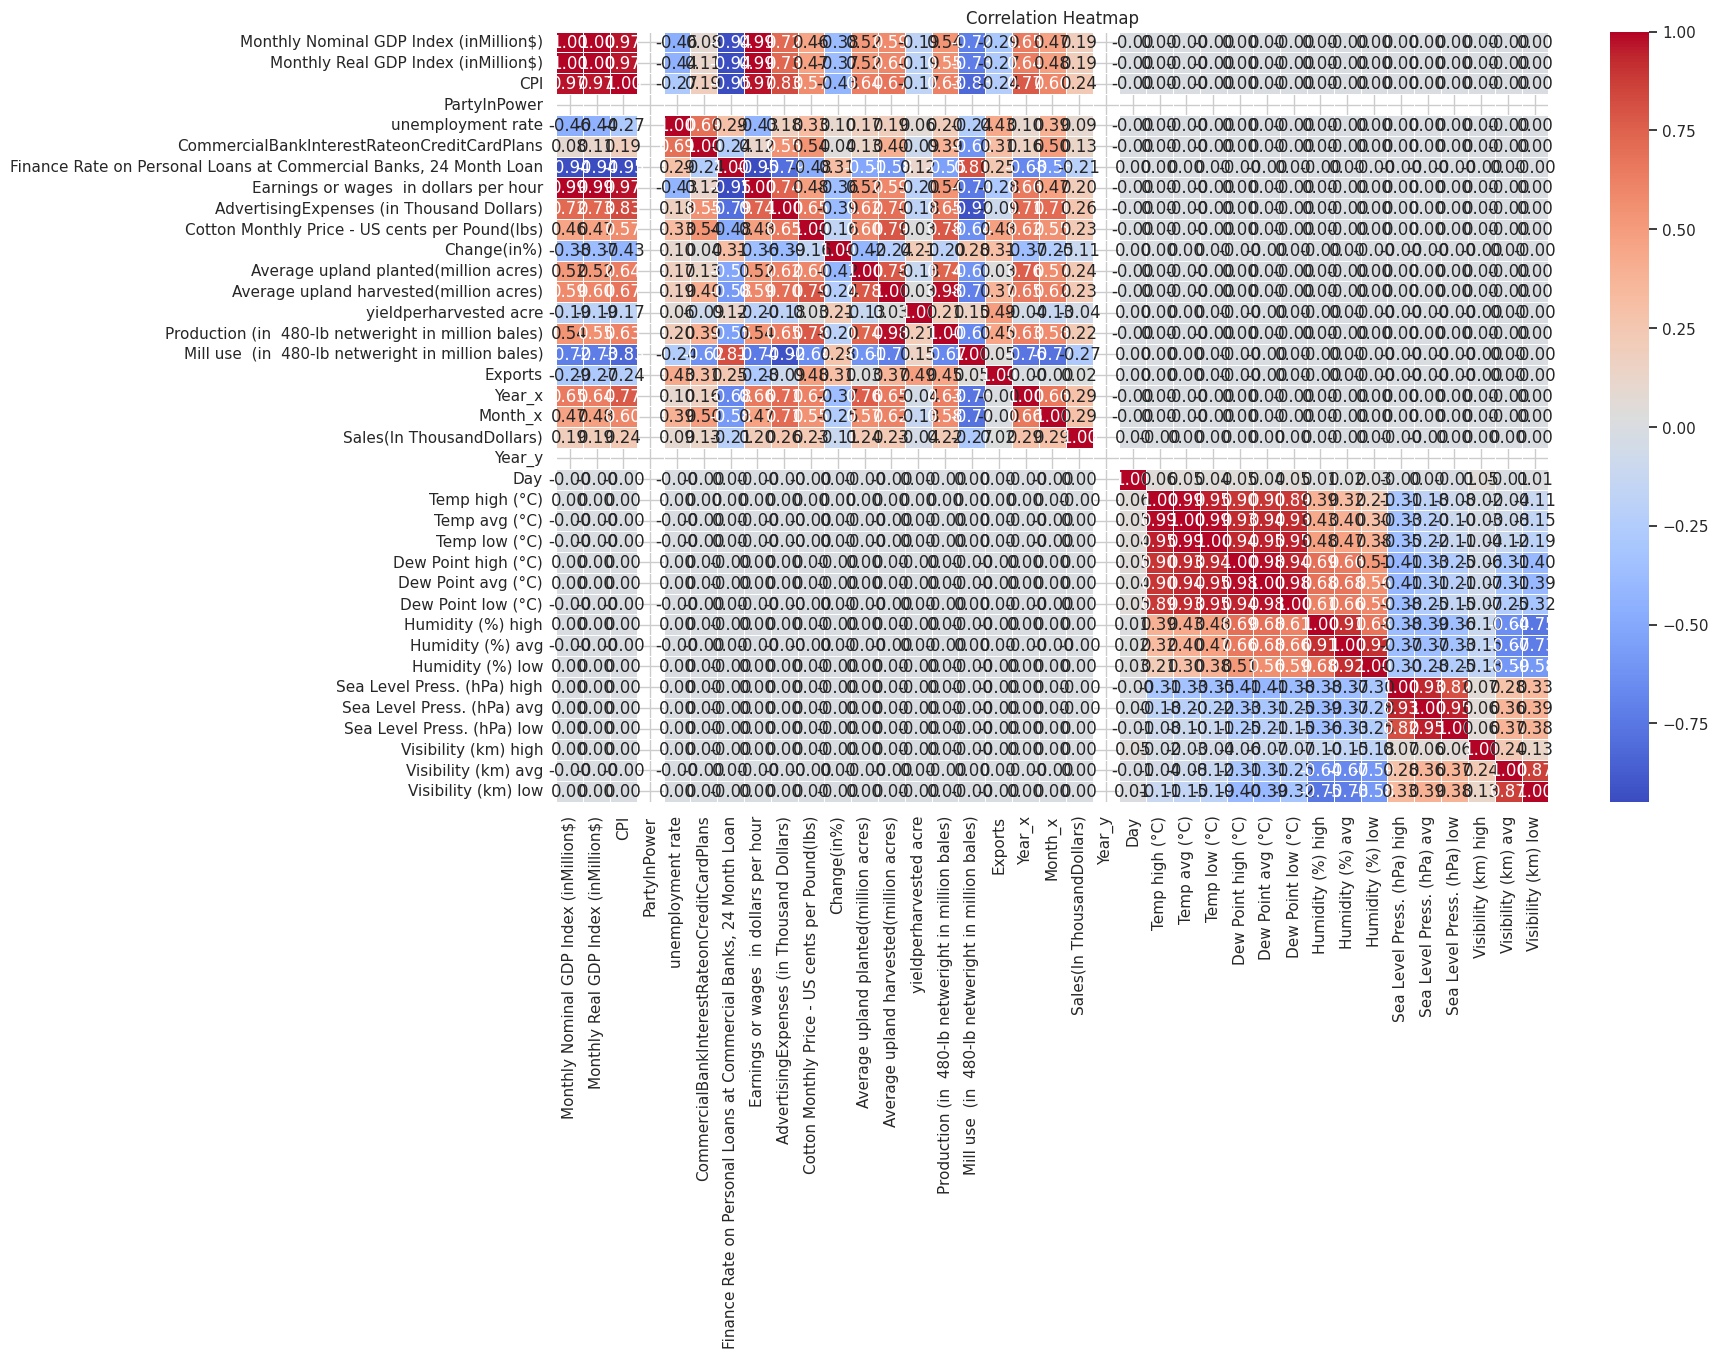

In [58]:
# Correlation Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(merged_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Linear Regression:

In [87]:
# Update the features list based on available columns
features = ['Monthly Nominal GDP Index (inMillion$)', 'CPI', 'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans', 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan', 'Earnings or wages  in dollars per hour', 'AdvertisingExpenses (in Thousand Dollars)', 'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)', 'Average upland planted(million acres)', 'Average upland harvested(million acres)', 'yieldperharvested acre', 'Production (in  480-lb netweright in million bales)', 'Mill use  (in  480-lb netweright in million bales)', 'Exports']

# Continue with the rest of the code
X = merged_data[features]
y = merged_data['Sales(In ThousandDollars)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")


Linear Regression Mean Squared Error: 426198.30379047693
Linear Regression R^2 Score: 0.08887625095523366


# the decision tree regression model

In [89]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit the decision tree regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regression R^2 Score: {r2_dt}")


Decision Tree Regression Mean Squared Error: 590083.8831139157
Decision Tree Regression R^2 Score: -0.2614771927810231


# the random forest regression model

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the random forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression R^2 Score: {r2_rf}")


Random Forest Regression Mean Squared Error: 536772.7358509583
Random Forest Regression R^2 Score: -0.14750899551672259


# the support vector regression model

In [92]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the support vector regression model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression Mean Squared Error: {mse_svr}")
print(f"Support Vector Regression R^2 Score: {r2_svr}")


Support Vector Regression Mean Squared Error: 504641.4466498288
Support Vector Regression R^2 Score: -0.07881895048790244


In [97]:
import pandas as pd

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Support Vector Regression'],
    'Mean Squared Error': [mse_lr, mse_dt, mse_rf, mse_svr],
    'R^2 Score': [r2_lr, r2_dt, r2_rf, r2_svr]
})

In [98]:
# Display the results in a table
results_df


,Model,Mean Squared Error,R^2 Score
0,Linear Regression,426198.303790,0.088876
1,Decision Tree Regression,590083.883114,-0.261477
2,Random Forest Regression,536772.735851,-0.147509
3,Support Vector Regression,504641.446650,-0.078819


# Time Series Analysis

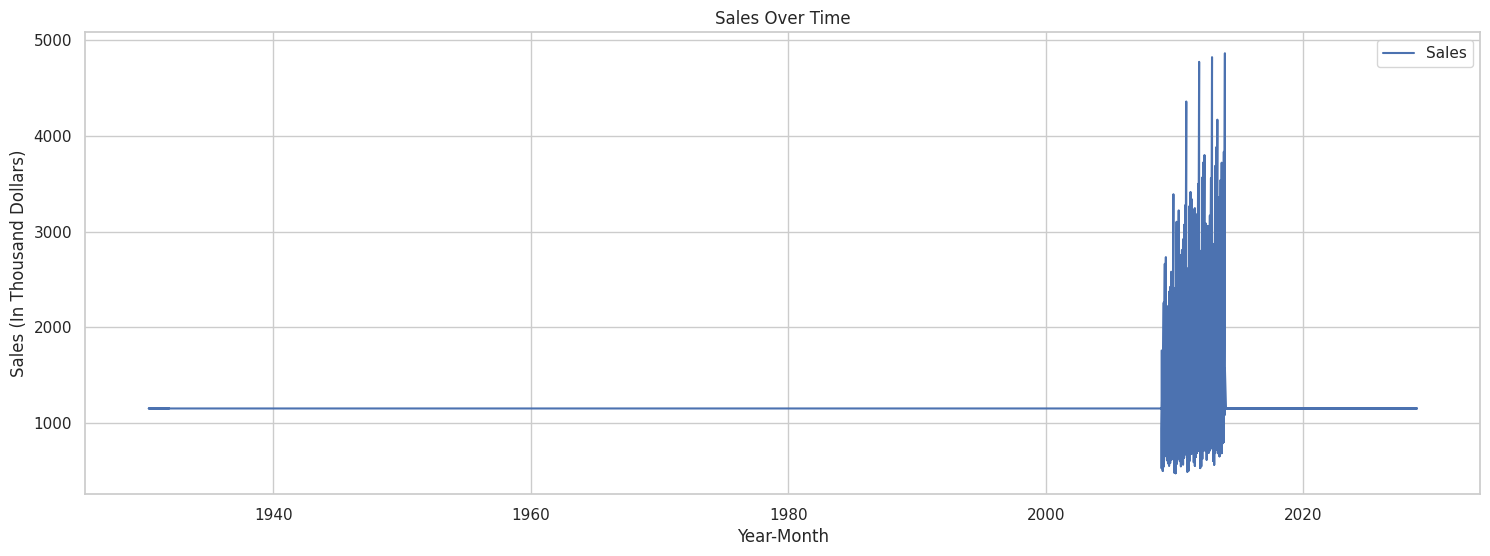

In [59]:
# Time Series Analysis
plt.figure(figsize=(18, 6))
plt.plot(merged_data['Year-Month'], merged_data['Sales(In ThousandDollars)'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales (In Thousand Dollars)')
plt.legend()
plt.show()


# Categorical Feature Analysis

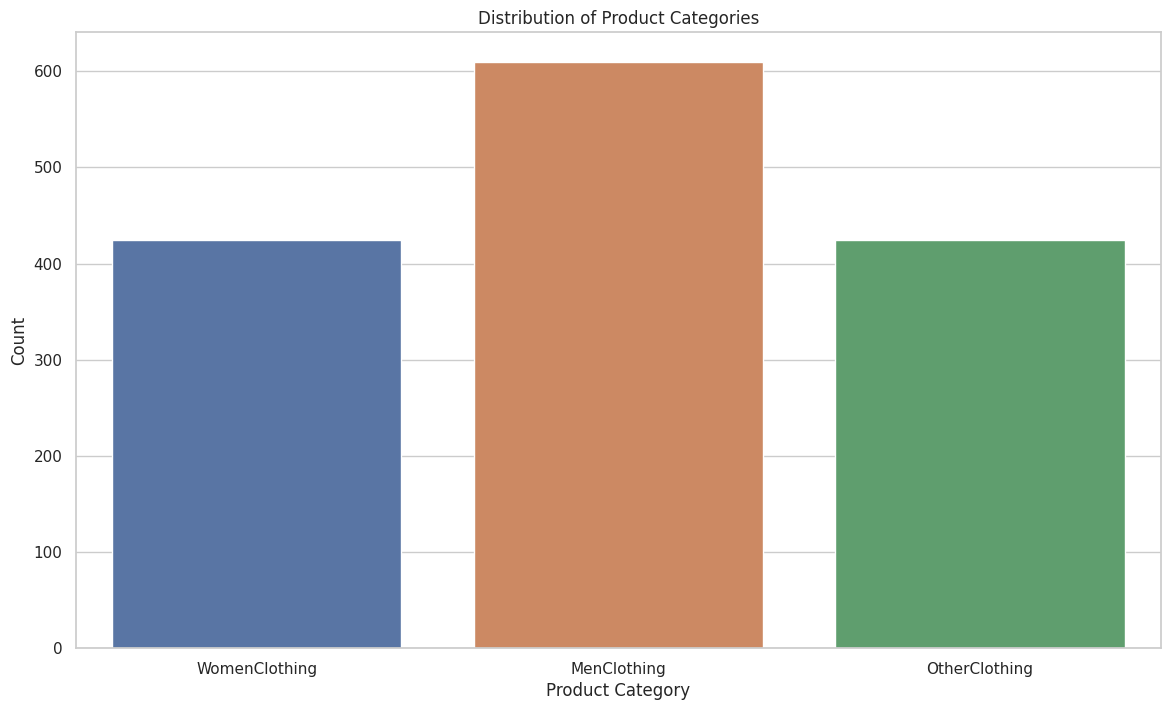

In [60]:
# Categorical Feature Analysis
plt.figure(figsize=(14, 8))
sns.countplot(x='ProductCategory', data=merged_data)
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

# Date-related Features

In [62]:
# Feature Engineering: Date-related Features
merged_data['Year'] = merged_data['Year-Month'].dt.year
merged_data['Month'] = merged_data['Year-Month'].dt.month
merged_data['Quarter'] = merged_data['Year-Month'].dt.quarter
merged_data['DayOfWeek'] = merged_data['Year-Month'].dt.dayofweek


In [63]:

# Display the head of the dataset after feature engineering
merged_data.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),...,Precip. (mm) sum,WeatherEvent,Date,Year,MonthDate,Event,DayCategory,Month,Quarter,DayOfWeek
0,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,0,Unknown,2009-01-01 00:00:00,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3
1,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,T,Snow,2009-01-02 00:00:00,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3
2,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,T,Unknown,2009-01-03 00:00:00,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3
3,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,0,Unknown,2009-01-04 00:00:00,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3
4,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,T,Unknown,2009-01-05 00:00:00,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3


# Lag Features for Sales

In [65]:
# Feature Engineering: Lag Features for Sales
num_lags = 3  # you can adjust the number of lag features
for i in range(1, num_lags+1):
    merged_data[f'Sales_Lag_{i}'] = merged_data['Sales(In ThousandDollars)'].shift(i)

# Drop rows with missing values introduced by lag features
merged_data.dropna(inplace=True)

In [66]:
# Display the head of the dataset after feature engineering
merged_data.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),...,Year,MonthDate,Event,DayCategory,Month,Quarter,DayOfWeek,Sales_Lag_1,Sales_Lag_2,Sales_Lag_3
6,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3,1755.0,1755.0,1755.0
7,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3,1755.0,1755.0,1755.0
8,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3,1755.0,1755.0,1755.0
9,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3,1755.0,1755.0,1755.0
10,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,2009,1931-12-01,Christmas Day,Federal Holiday,1,1,3,1755.0,1755.0,1755.0


# One-Hot Encoding
Convert categorical features into numerical format using one-hot encoding.

In [67]:
# Feature Engineering: One-Hot Encoding
merged_data = pd.get_dummies(merged_data, columns=['ProductCategory', 'Event', 'DayCategory'], drop_first=True)

# Display the head of the dataset after one-hot encoding
merged_data.head()


,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),...,Event_Memorial Day,Event_Mother's Day,Event_New Year's Day,Event_New Year's Eve,Event_Presidents' Day,Event_Thanksgiving Day,Event_Thomas Jefferson's Birthday,Event_Valentine's Day,Event_Veterans Day,DayCategory_Federal Holiday
6,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,False,False,False,False,False,False,False,False,False,True
7,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,False,False,False,False,False,False,False,False,False,True
8,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,False,False,False,False,False,False,False,False,False,True
9,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,False,False,False,False,False,False,False,False,False,True
10,2009-01-01,14421.752895,14407.053343,233.402,0.0,7.8,12.03,11.44,22.05,137.0,...,False,False,False,False,False,False,False,False,False,True
